In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.fft as fft  #we use scipy for the fft

### Read data

In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
# data = pd.read_csv("05112024/C1--DAC_BOARD1--00001.csv", sep=",")  # Replace 'your_data.csv' with your file name
data = pd.read_csv('05112024/C1--DAC_BOARD1--00001.csv', skiprows=5, header=None) # No header



# time = []
# mag = []
# # Open and read the file
# with open('05112024/C1--DAC_BOARD1--00001.csv', 'r') as file:
#     reader = csv.reader(file, delimiter=',')
    
#     # Loop through each row and print the columns
#     for row in reader:
#         column1, column2 = row  # Split columns
#         time1 = float(column1)
#         time.append(time1)
#         mag1 = float(column2)
#         mag.append(mag1)
#         # print(f"Column 1: {column1}, Column 2: {column2}")

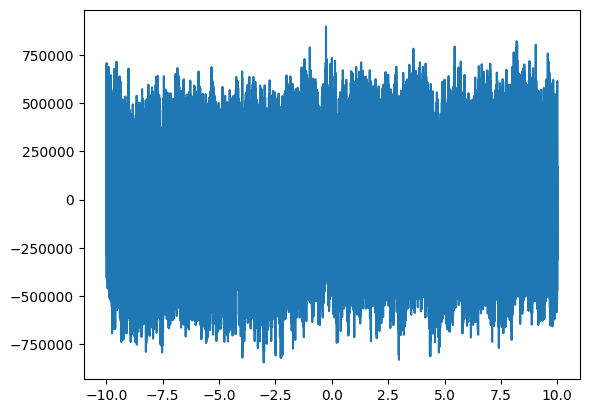

In [3]:
data[1] = data[1]*1e12*2/(510*1000)
plt.plot(data[0], data[1])


## Fourrier transform 

In [4]:
import numpy as np
from scipy.fft import fft, fftfreq

def PSD(signal, Fs):
    # Number of samples in the signal
    N = len(signal)
    
    # Compute the FFT values
    fft_values = fft(signal)
    
    # Compute the corresponding frequencies
    freq = fftfreq(N, 1 / Fs)
    
    # Only keep the positive frequencies
    pos_mask = freq >= 0
    
    # Return the positive frequencies and their magnitudes
    return freq[pos_mask], 2*np.abs(fft_values[pos_mask])/N

### Power Spectral Density

In [5]:
def compute_fourier_transform(signal, sample_rate):
    """
    Computes the Fourier Transform of a given signal.
    
    Parameters:
    signal (numpy array): The input signal to be transformed.
    sample_rate (float): The sampling rate of the signal (in Hz).
    
    Returns:
    freq (numpy array): Frequencies corresponding to the Fourier Transform.
    amplitude (numpy array): Amplitude of the Fourier Transform at the given frequencies.
    """
    # Number of sample points
    N = len(signal)
    
    # Compute the Fourier Transform
    yf = fft(signal)
    
    # Compute the frequency bins
    xf = fftfreq(N, 1/sample_rate)[:N//2]
    
    # Compute the amplitude spectrum
    amplitude = 2.0/N * np.abs(yf[:N//2])
    
    return xf, amplitude

In [6]:

def compute_power_spectral_density(signal, sample_rate, nperseg):
    from scipy.signal import welch
    """
    Computes the Power Spectral Density (PSD) of a given signal using Welch's method.
    
    Parameters:
    signal (numpy array): The input signal.
    sample_rate (float): The sampling rate of the signal (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).
    
    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    psd (numpy array): Power Spectral Density at each frequency.
    """
    # Compute the Power Spectral Density using Welch's method
    freq, psd = welch(signal, sample_rate, nperseg=nperseg)
    return freq, psd
    

## Noise plot 

In this analysis, there are something to note: 

1. The DAC's voltage measured within 10s by the Oscilloscope with BW = 1 GHz
2. DAC voltage converted into current using the relation below:
       $$ \sqrt{S_I} = \frac{n_{out}*2}{1000*510} = \frac{n_{out \times 2}}{510000}  * 10^{12} [pA]  $$ ($10^{12}$ to convert it into $pA$)
3. Data taken by Oscilloscope in 20s. With 50k sps/s with Board 1,6 and 1k sps/s for Board 4 (forgot to change)

## Board 1 

In [7]:
data1 = pd.read_csv('05112024/C1--DAC_BOARD1--00001.csv', skiprows=5, header=None) # No header

N = 49875.31172112822
49875.31172112822
500002


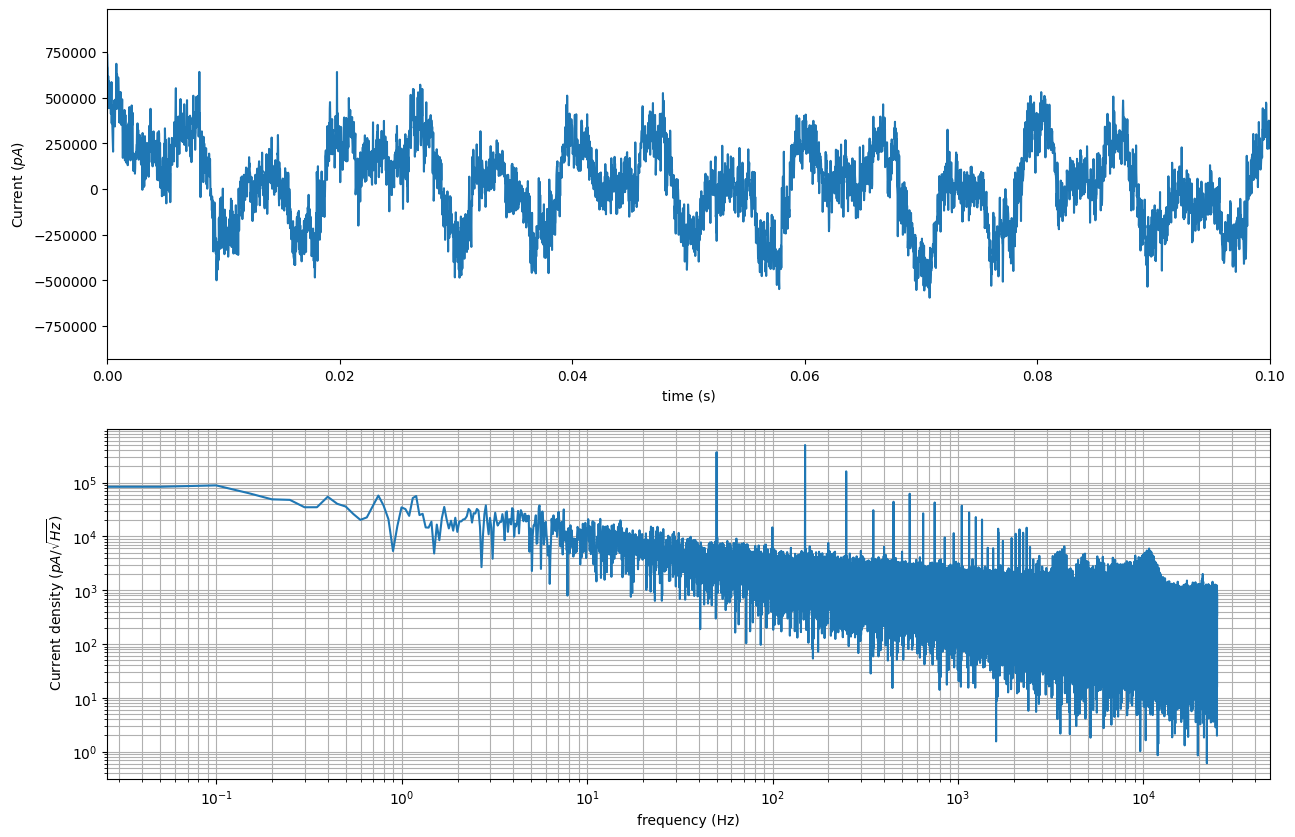

In [8]:
# FS = 1000
N =  1/(data1[0][1] - data1[0][0])
print(f'N = {N}')
fre1, val1 = compute_power_spectral_density(data1[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data1[0],data1[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre1,np.sqrt(val1), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
print(1/(data1[0][1] - data1[0][0]))
plt.grid(True, which="both")
print(np.size(fre1))

### Board 3 

In [9]:
data3 = pd.read_csv('05112024/C1--DAC_BOARD3--00000.csv', skiprows=5, header=None) # No header

N = 50125.31328211532
50125.31328211532
500002


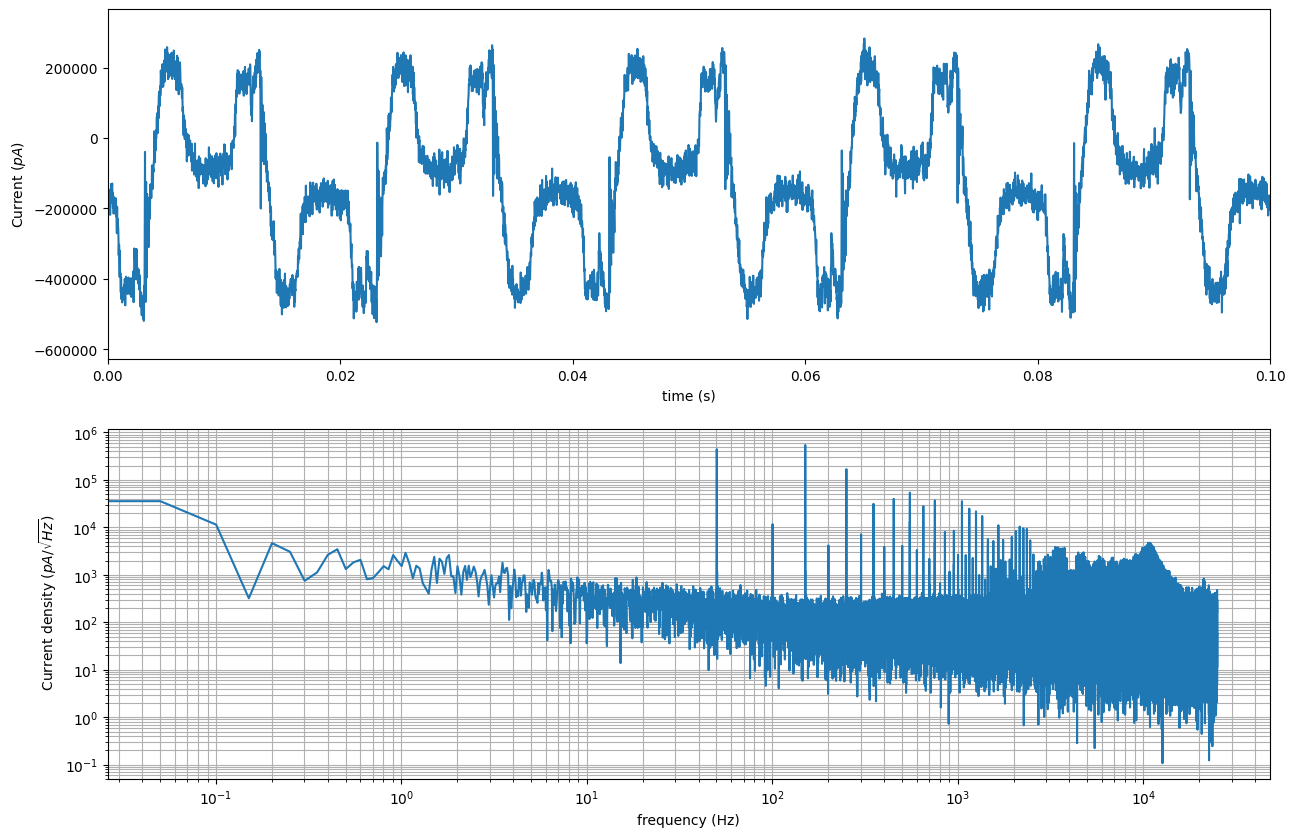

In [10]:
# FS = 1000
N =  1/(data3[0][1] - data3[0][0])
print(f'N = {N}')
fre3, val3 = compute_power_spectral_density(data3[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data3[0],data3[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre3,np.sqrt(val3), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
print(1/(data3[0][1] - data3[0][0]))
plt.grid(True, which="both")
print(np.size(fre3))

### Board 4

In [11]:
data4 = pd.read_csv('05112024/C1--DAC_BOARD4--00000.csv', skiprows=5, header=None) # No header

N = 49975.01249357768
49975.01249357768
500002


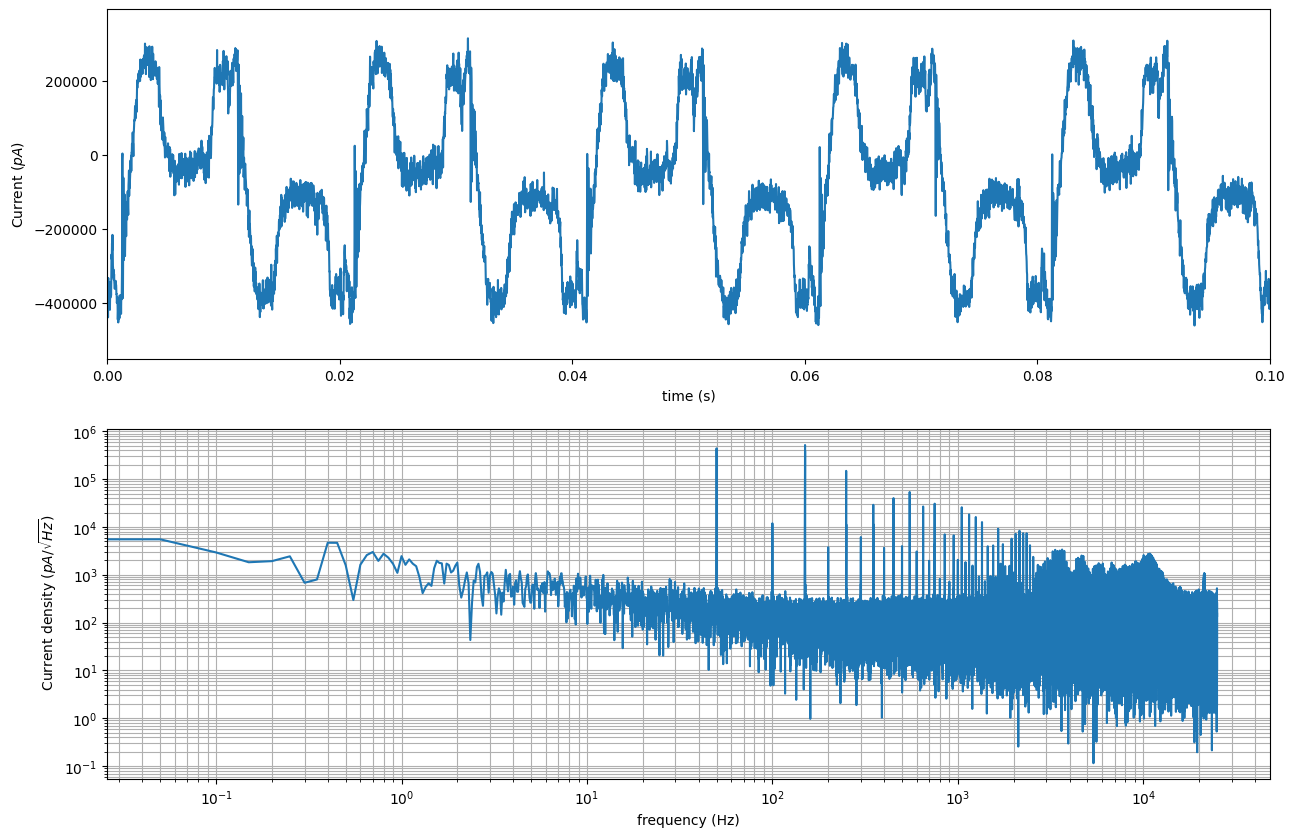

In [12]:
# FS = 1000
N =  1/(data4[0][1] - data4[0][0])
print(f'N = {N}')
fre4, val4 = compute_power_spectral_density(data4[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data4[0],data4[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre4,np.sqrt(val4), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data4[0][1] - data4[0][0]))
print(np.size(fre4))

### Board 5

In [13]:
data5 = pd.read_csv('05112024/C1--DAC_BOARD5--00000.csv', skiprows=5, header=None) # No header

N = 49975.01249357768
49975.01249357768
500002


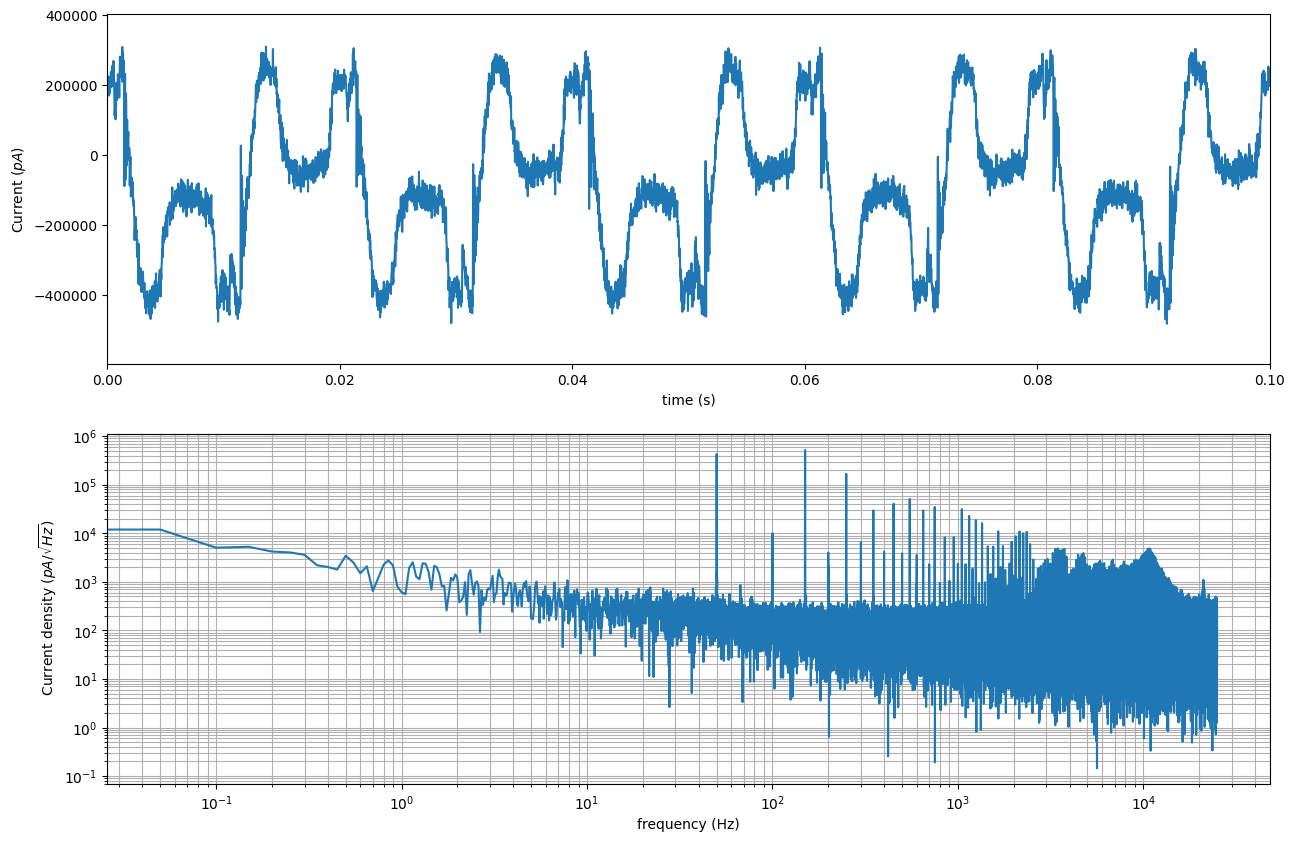

In [14]:
# FS = 1000
N =  1/(data5[0][1] - data5[0][0])
print(f'N = {N}')
fre5, val5 = compute_power_spectral_density(data5[1]*1e12*2/(510*1000), N, 1000002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data5[0],data5[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.ylabel(r'Current $(pA)$')
plt.xlim(0,0.1)
plt.subplot(212)
plt.loglog(fre5,np.sqrt(val5), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
print(1/(data5[0][1] - data5[0][0]))
print(np.size(fre5))
plt.grid(True, which="both")

### Board 6

In [15]:
data6 = pd.read_csv('05112024/C1--DAC_BOARD6--00000.csv', skiprows=5, header=None) # No header

N = 49925.11233163061
49925.11233163061
500001


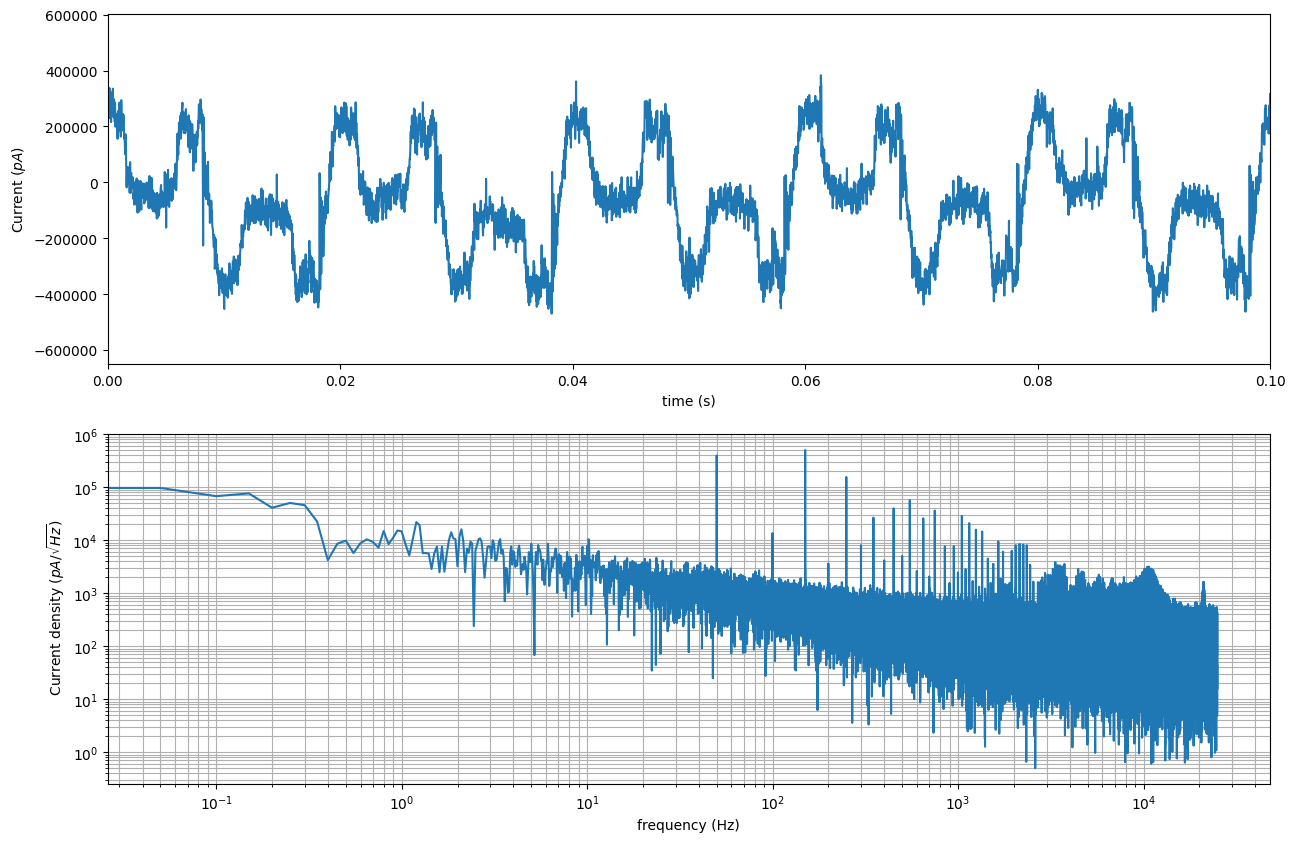

In [16]:
# FS = 1000
N =  1/(data6[0][1] - data6[0][0])
print(f'N = {N}')
fre6, val6 = compute_power_spectral_density(data6[1]*1e12*2/(510*1000), N, 1000000)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data6[0],data6[1]*1e12*2/(510*1000), label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre6,np.sqrt(val6), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data6[0][1] - data6[0][0]))
print(np.size(fre6))

## Compare the different between the PSD 

Text(0.5, 1.0, 'current noise density computed by the time domain signal of DAC')

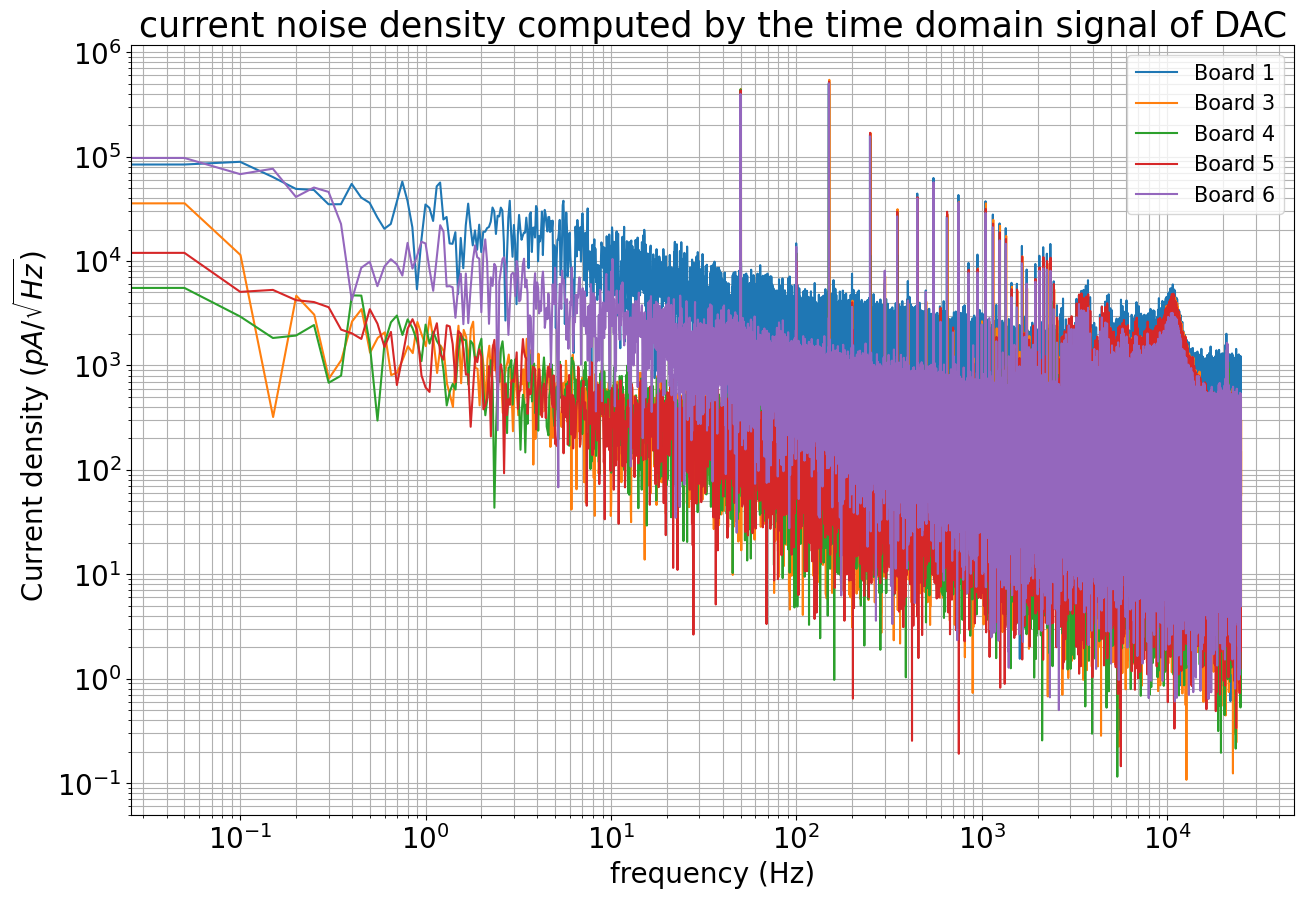

In [17]:
import matplotlib.pyplot as plt
num = [1,3,4,5,6]
fre = [fre1,fre3,fre4,fre5,fre6]
val = [val1,val3,val4,val5,val6]

plt.figure(figsize = (15,10))
for i in range(len(fre)):
    plt.loglog(fre[i], np.sqrt(val[i]), label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density computed by the time domain signal of DAC',fontsize = 25)


### Ploting data from TID test

In [18]:
TID = np.genfromtxt('PSD_TID_DAC.txt')

Text(0.5, 1.0, 'current noise density measured in TID test')

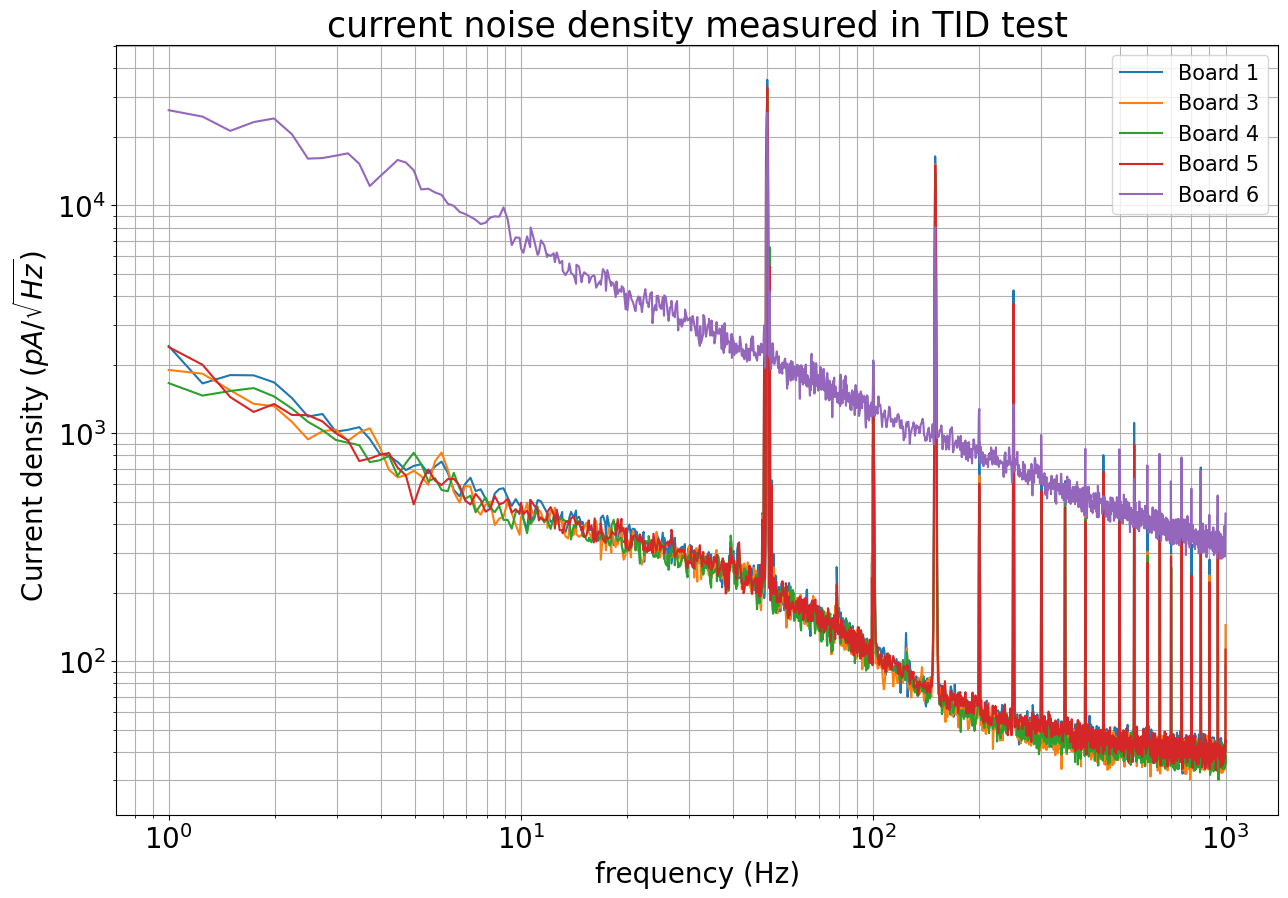

In [19]:
plt.figure(figsize = (15,10))
for i in range(len(num)):
    plt.loglog(TID[:,0], TID[:,i+1], label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density measured in TID test',fontsize = 25)


### Compare

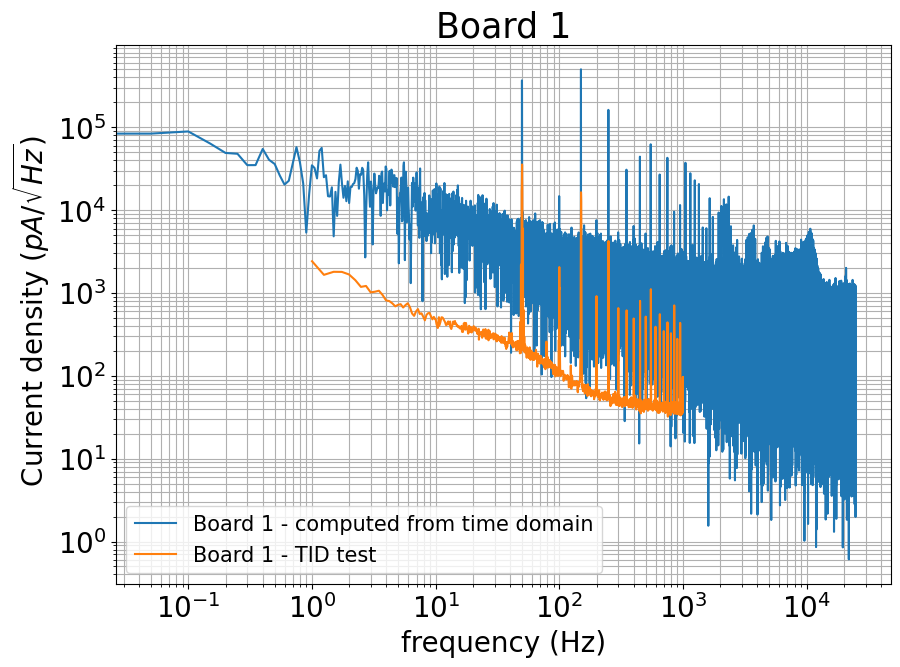

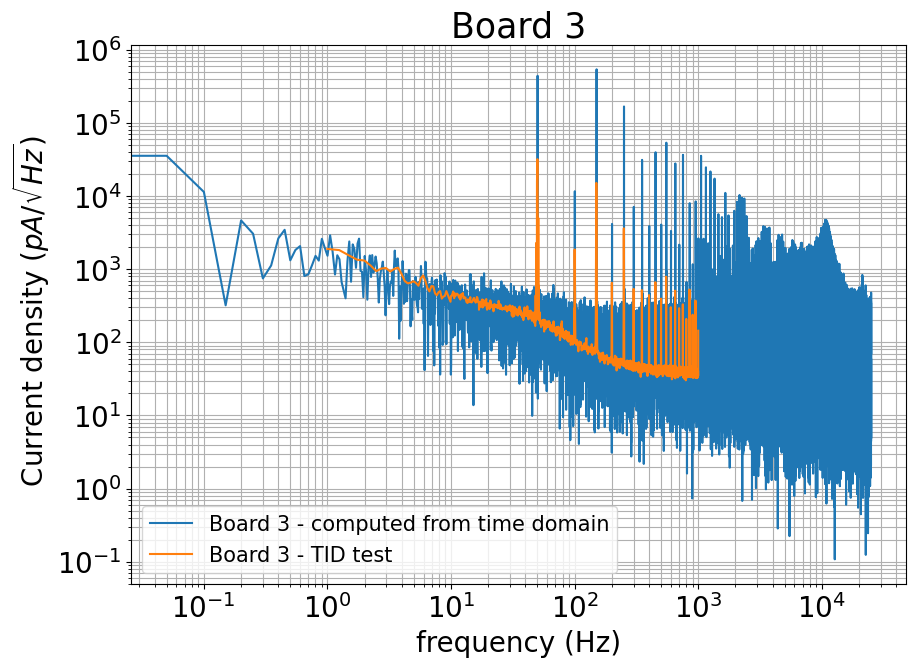

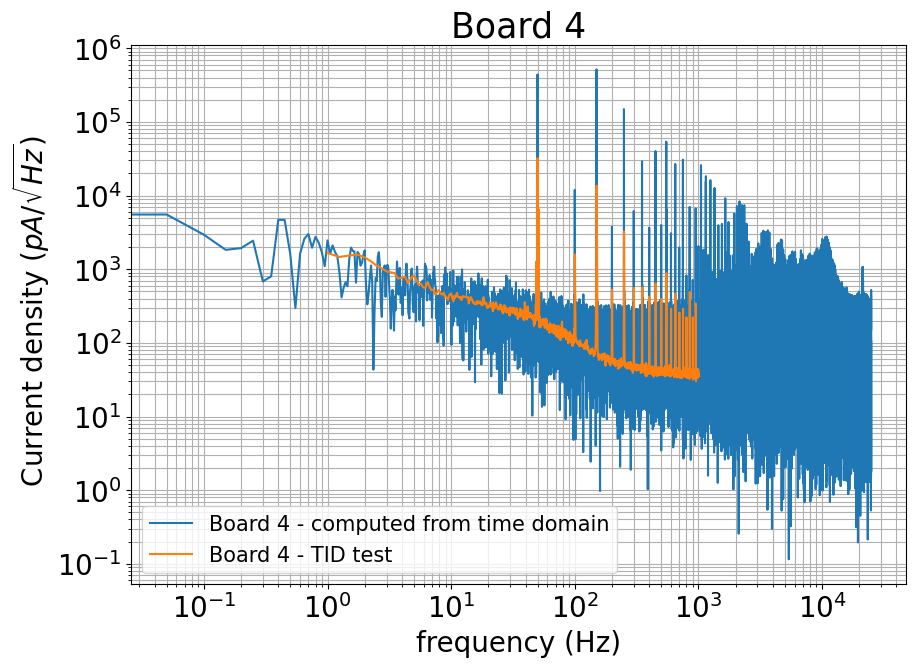

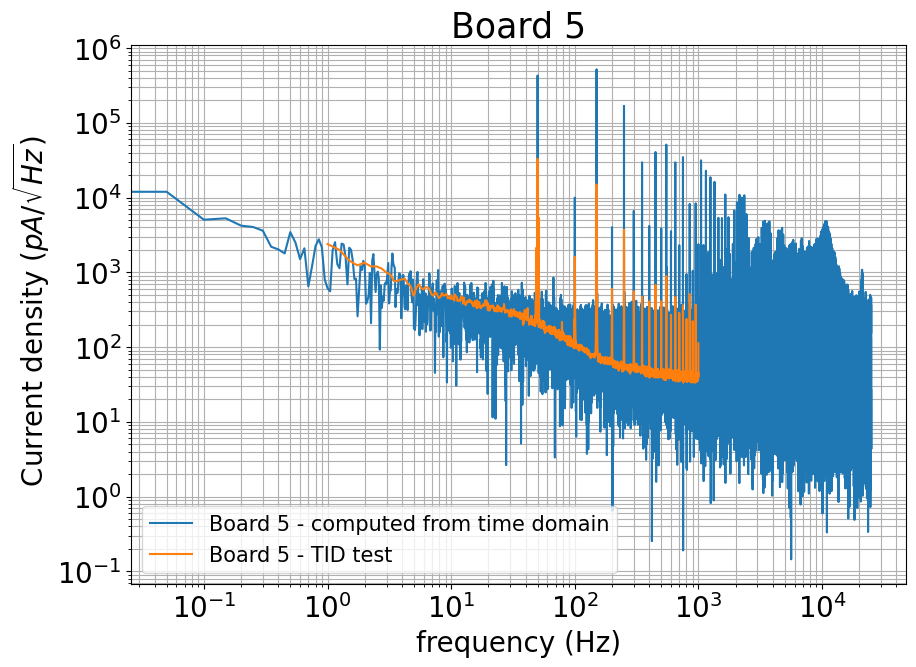

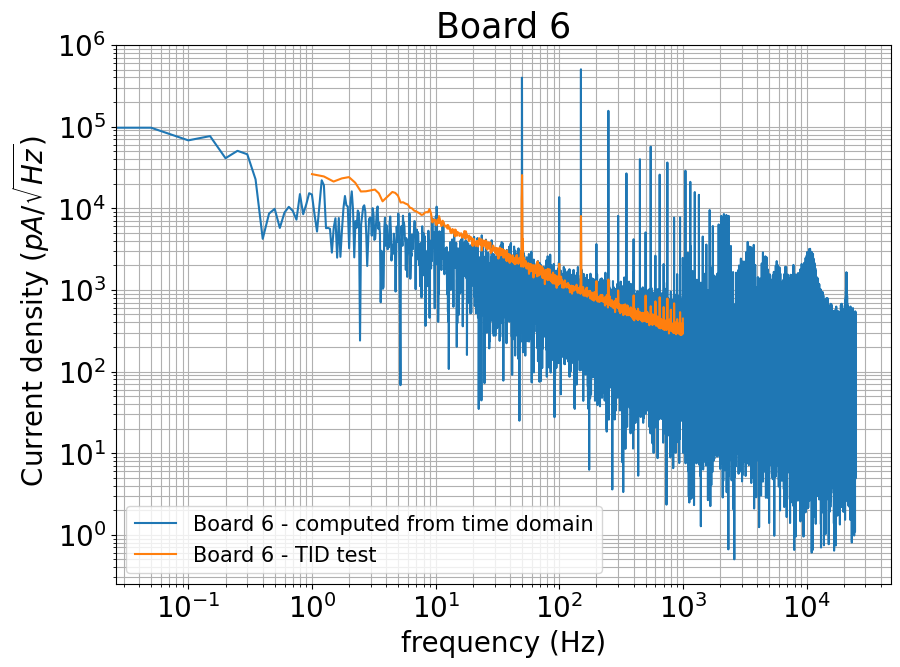

In [20]:
color = ['black', 'orange', 'green', 'red', 'brown']
num = [1,3,4,5,6]
for i in range(len(num)):
    plt.figure(figsize = (10,7))
    plt.loglog(fre[i], np.sqrt(val[i]), label = f'Board {num[i]} - computed from time domain')
    plt.loglog(TID[:,0], TID[:,i+1], label = f'Board {num[i]} - TID test')
    plt.xlabel('frequency (Hz)',fontsize = 20)
    plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 15)
    plt.grid(True, which="both")
    plt.title(f'Board {num[i]}',fontsize = 25)


### Comparing the drift

In [21]:
def data_selection(ti,te, t):
    '''
    the idea is to return the index of data lies within the range of ti and te
    '''
    in1 = np.where(t >= ti)
    in2 = np.where(t <= te)
    ind = np.intersect1d(in1,in2)
    return ind

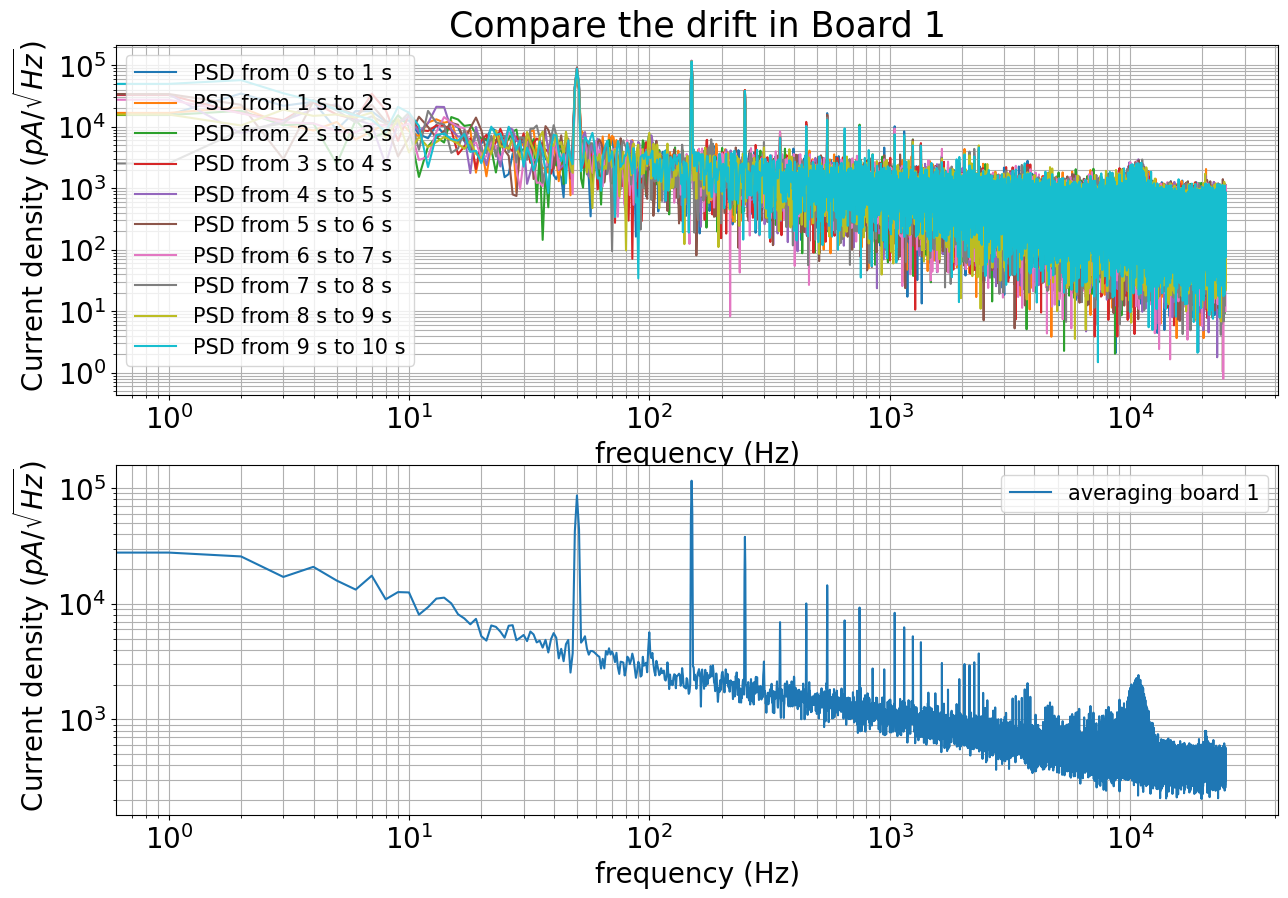

In [22]:
# test sample: data1 
factor = 1e12/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg1 = np.zeros(np.size(data1[0][data_selection(i,i+1, data1[0])])//2+1)

plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data1[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg1 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 1',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg1/10), label = f'averaging board 1')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

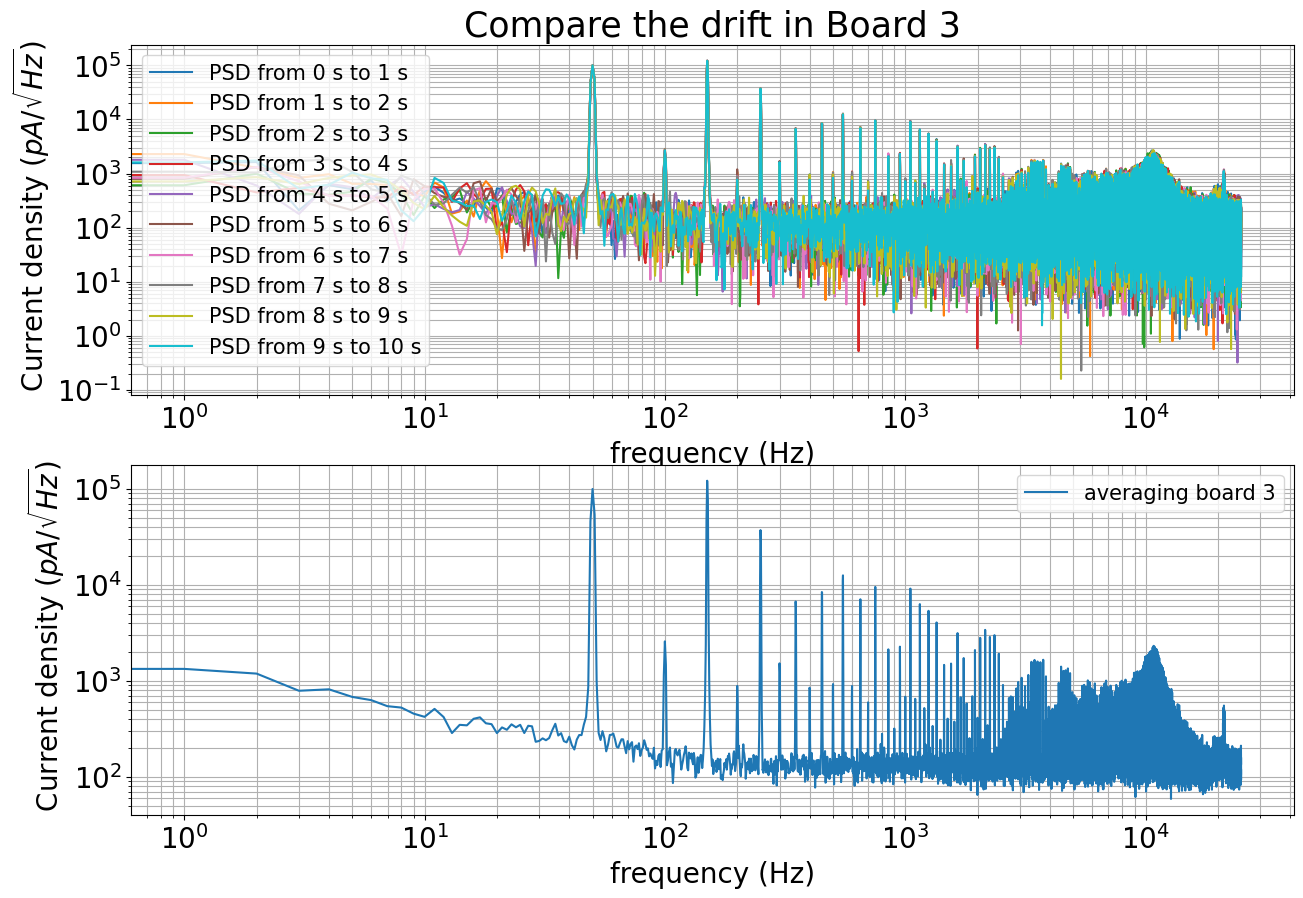

In [23]:
# test sample: data1 
factor = 1e12/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg3 = np.zeros(np.size(data3[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data3[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg3 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 3',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg3/10), label = f'averaging board 3')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

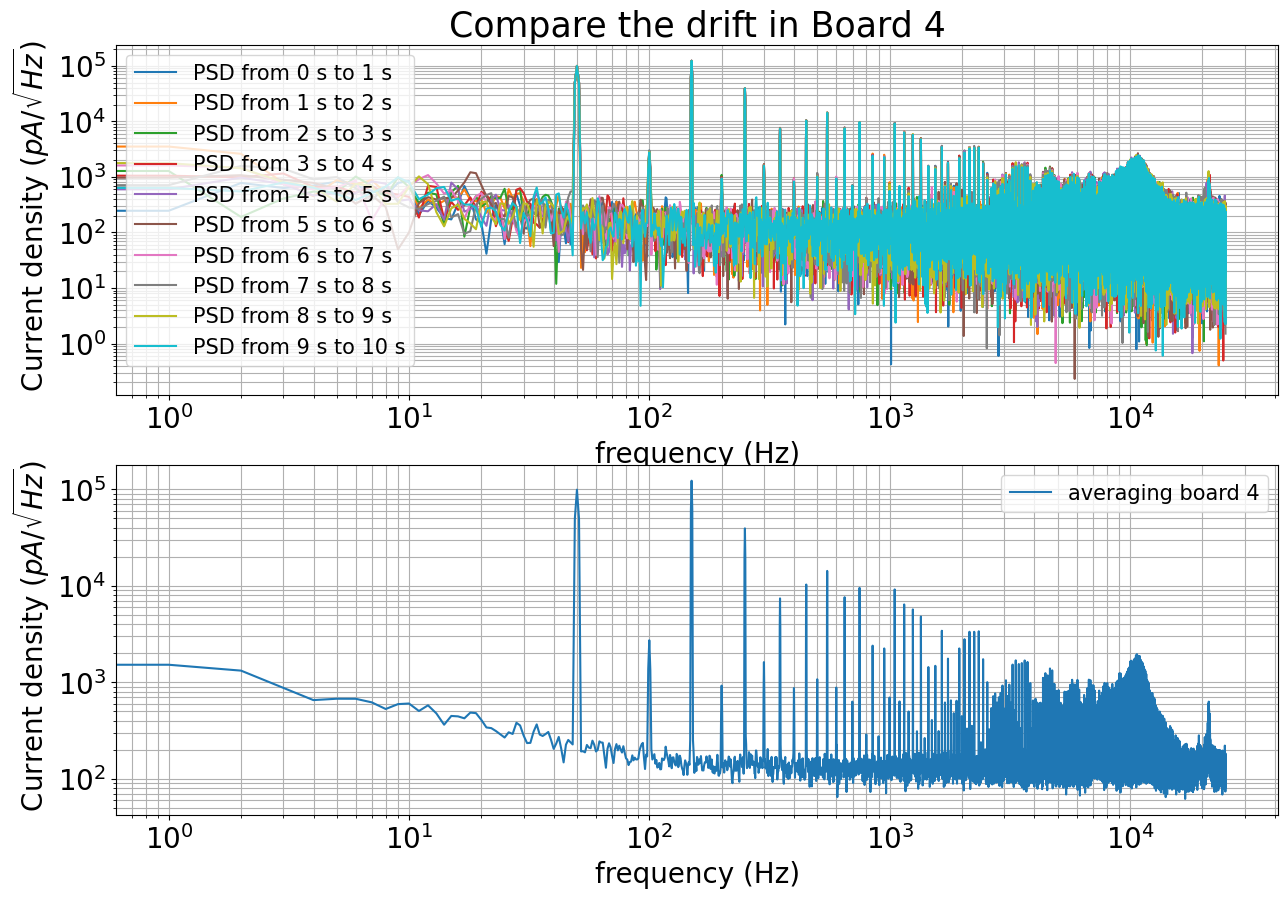

In [24]:
# test sample: data1 
factor = 1e12/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg4 = np.zeros(np.size(data4[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data4[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg4 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 4',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg4/10), label = f'averaging board 4')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

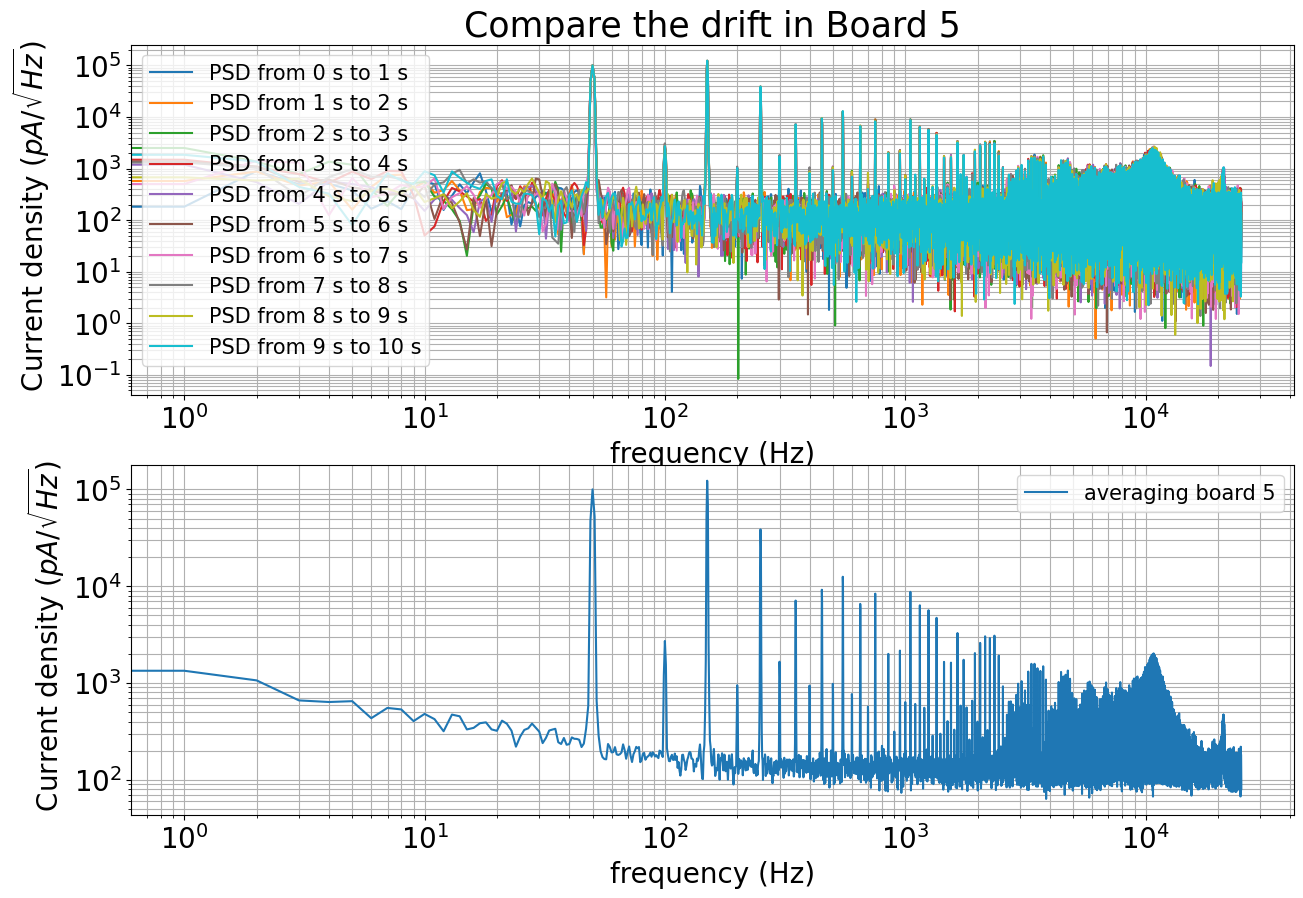

In [25]:
# test sample: data1 
factor = 1e12/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg5 = np.zeros(np.size(data5[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data5[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg5 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg5/10), label = f'averaging board 5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

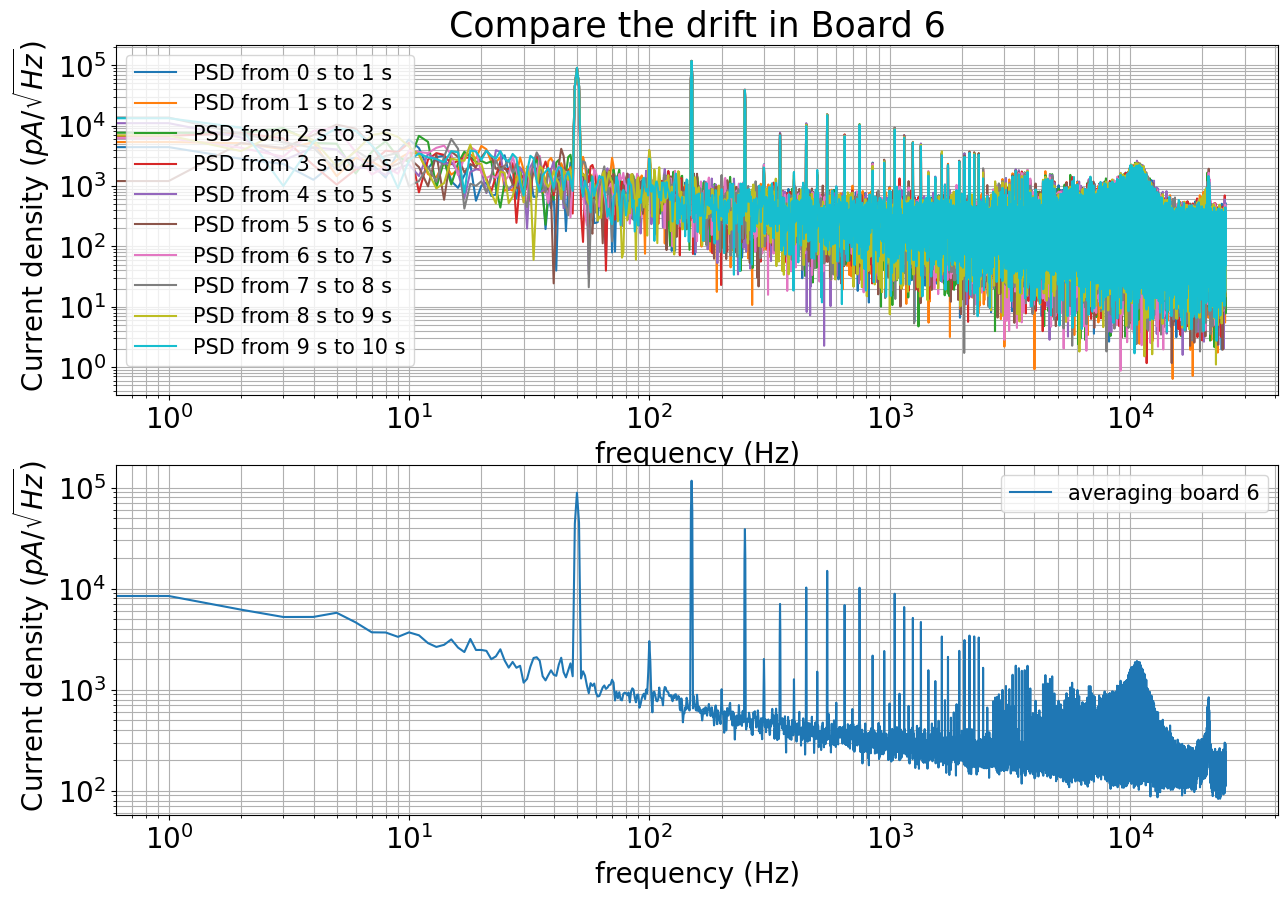

In [26]:
# test sample: data1 
factor = 1e12/(510*1000)
#we divide it to 10 ranges 
# r = np.arange(0,10,1)
avg6 = np.zeros(np.size(data6[0][data_selection(i,i+1, data1[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data6[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)
    avg6 += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in Board 6',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg6/10), label = f'averaging board 6')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### Compare again them and with TID data

Text(0.5, 1.0, 'current noise density computed by the time domain signal of DAC (avg)')

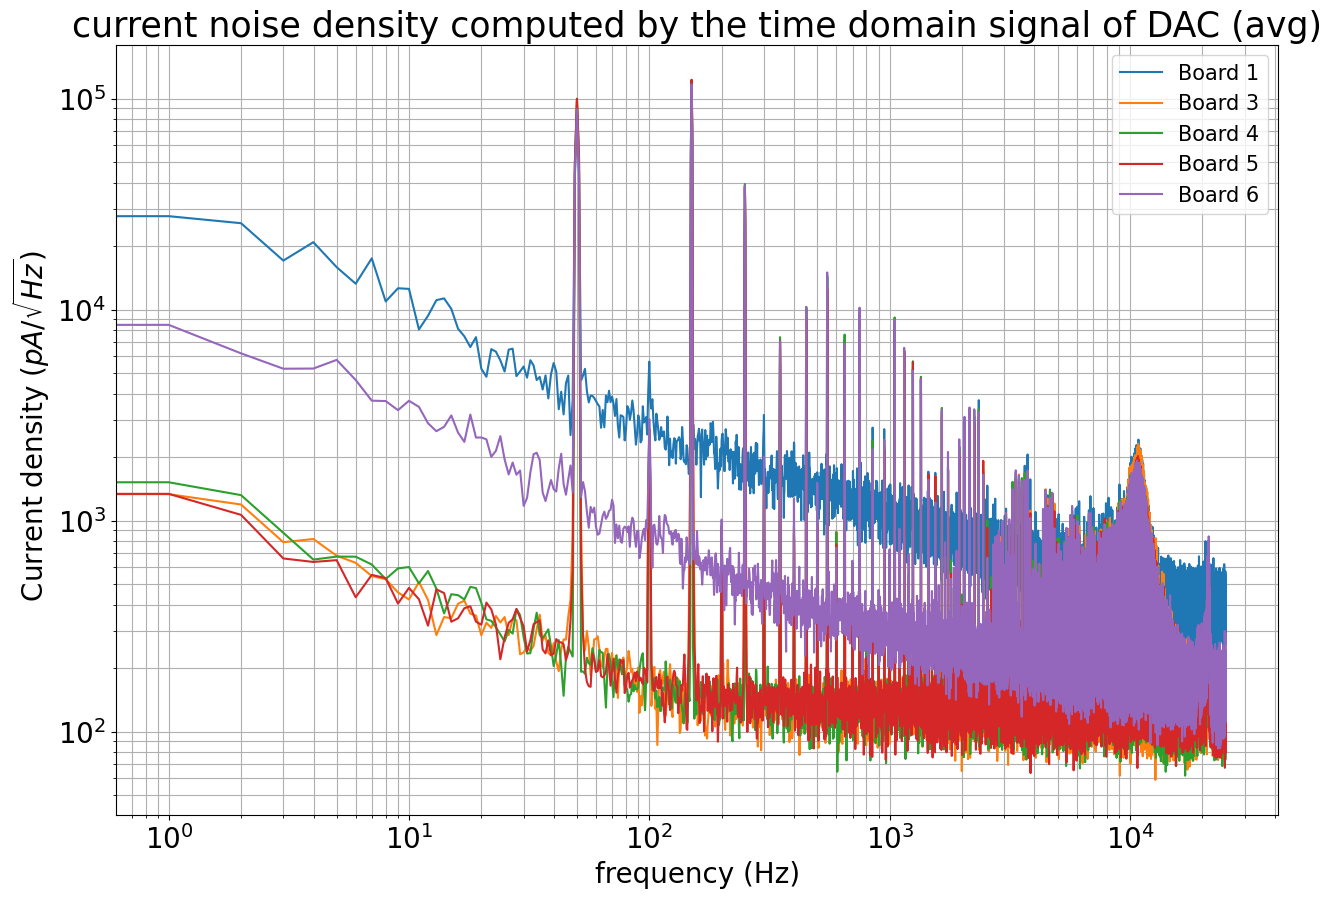

In [27]:
import matplotlib.pyplot as plt
num = [1,3,4,5,6]
avg = [avg1,avg3,avg4,avg5,avg6]
fre = compute_power_spectral_density(data6[1][data_selection(i,i+1, data1[0])]*1e12*2/(510*1000), N, 50000)[0]
plt.figure(figsize = (15,10))
for i in range(len(num)):
    plt.loglog(fre, np.sqrt(avg[i]/10), label = f'Board {num[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('current noise density computed by the time domain signal of DAC (avg)',fontsize = 25)

## Tesla vs Edison 

Goverment (CNES) gave them two the funding and AwaXe v4 (board 5). They have to measure the output noise of the DAC using different type of power source. 

### 1. Read data 

In [28]:
# Tesla 

B5LFPS = np.genfromtxt('dat/B5LFPS.TXT')
B5HFPS = np.genfromtxt('dat/B5HFPS.TXT')

# Tesla with filter  

B5LFFF = np.genfromtxt('dat/B5LFFF.TXT')
B5HFFF = np.genfromtxt('dat/B5HFFF.TXT')


# Edison 

B5LFBA = np.genfromtxt('dat/B5LFBA.TXT')
B5HFBA = np.genfromtxt('dat/B5HFBA.TXT')

#### 1.1. Plot tesla 

Text(0.5, 1.0, 'Current density measured in board 5 AwaXe v4')

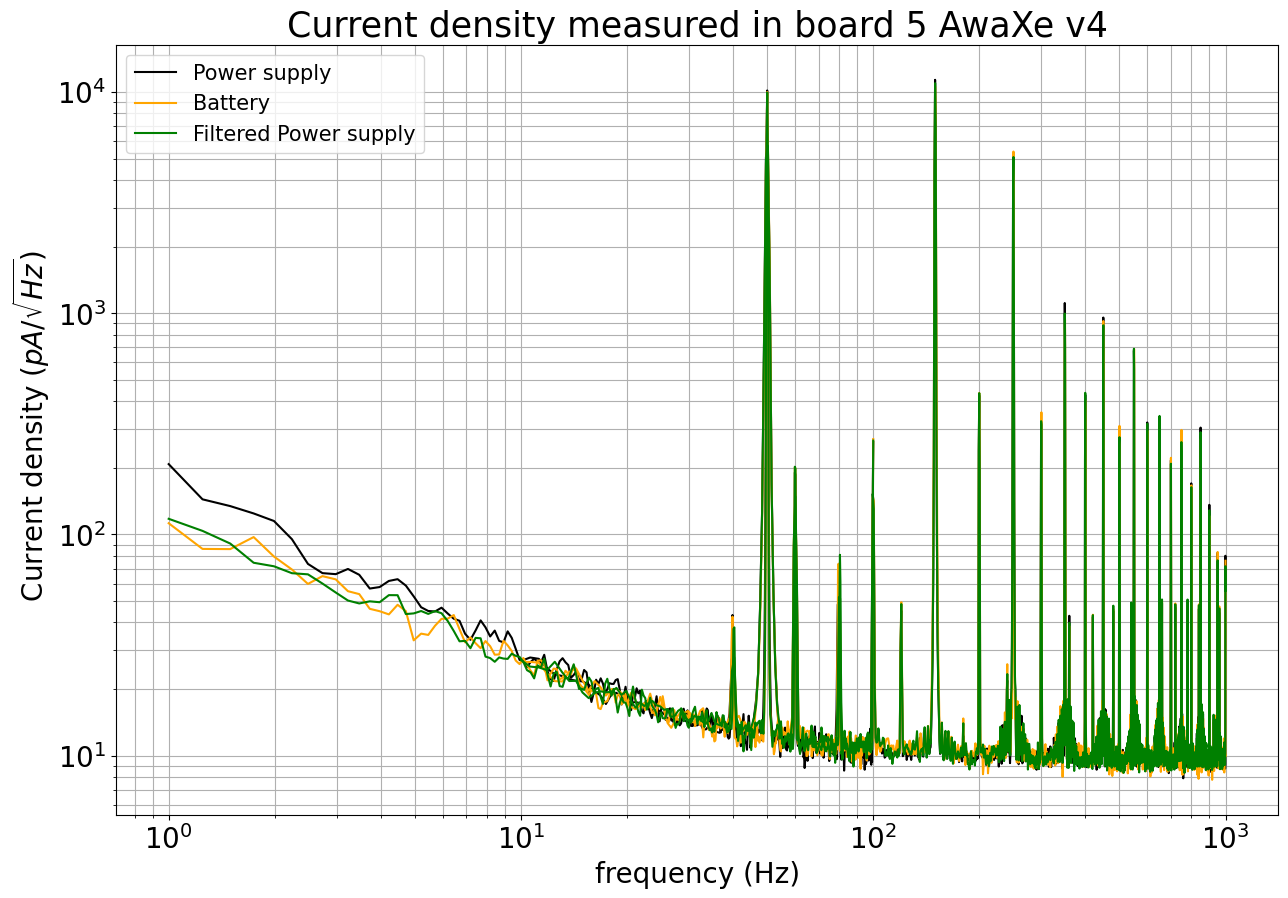

In [29]:
factor = 1e12/(510*1000)
plt.figure(figsize = (15,10))
# plt.subplot(211)
plt.loglog(B5LFPS[:,0], B5LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(B5HFPS[:,0], B5HFPS[:,1]*factor, color = color[0] )
plt.loglog(B5LFBA[:,0], B5LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(B5HFBA[:,0], B5HFBA[:,1]*factor, color = color[1] )
plt.loglog(B5LFFF[:,0], B5LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(B5HFFF[:,0], B5HFFF[:,1]*factor, color = color[2] )
n =  2
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Current density measured in board 5 AwaXe v4',fontsize = 25) 
# plt.savefig('the_war_of_power_source_in_DAC_measurent.png')
# plt.subplot(212)
# plt.loglog(fre,np.sqrt(avg6/10), label = f'averaging board 6')
# plt.xlabel('frequency (Hz)',fontsize = 20)
# plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.legend(fontsize = 15)
# plt.grid(True, which="both")

#### 1.2. Plot Edison

In [30]:
#noise squid

S4LFPS = np.genfromtxt('dat1/S4LFPS.TXT')
S4HFPS = np.genfromtxt('dat1/S4HFPS.TXT')

# Tesla with filter  

S4LFFF = np.genfromtxt('dat1/S4LFFF.TXT')
S4HFFF = np.genfromtxt('dat1/S4HFFF.TXT')


# Edison 

S4LFBA = np.genfromtxt('dat1/S4LFBA.TXT')
S4HFBA = np.genfromtxt('dat1/S4HFBA.TXT')

#noise TES

T4LFPS = np.genfromtxt('dat1/T4LFPS.TXT')
T4HFPS = np.genfromtxt('dat1/T4HFPS.TXT')

# Tesla with filter  

T4LFFF = np.genfromtxt('dat1/T4LFFF.TXT')
T4HFFF = np.genfromtxt('dat1/T4HFFF.TXT')


# Edison 

T4LFBA = np.genfromtxt('dat1/T4LFBA.TXT')
T4HFBA = np.genfromtxt('dat1/T4HFBA.TXT')

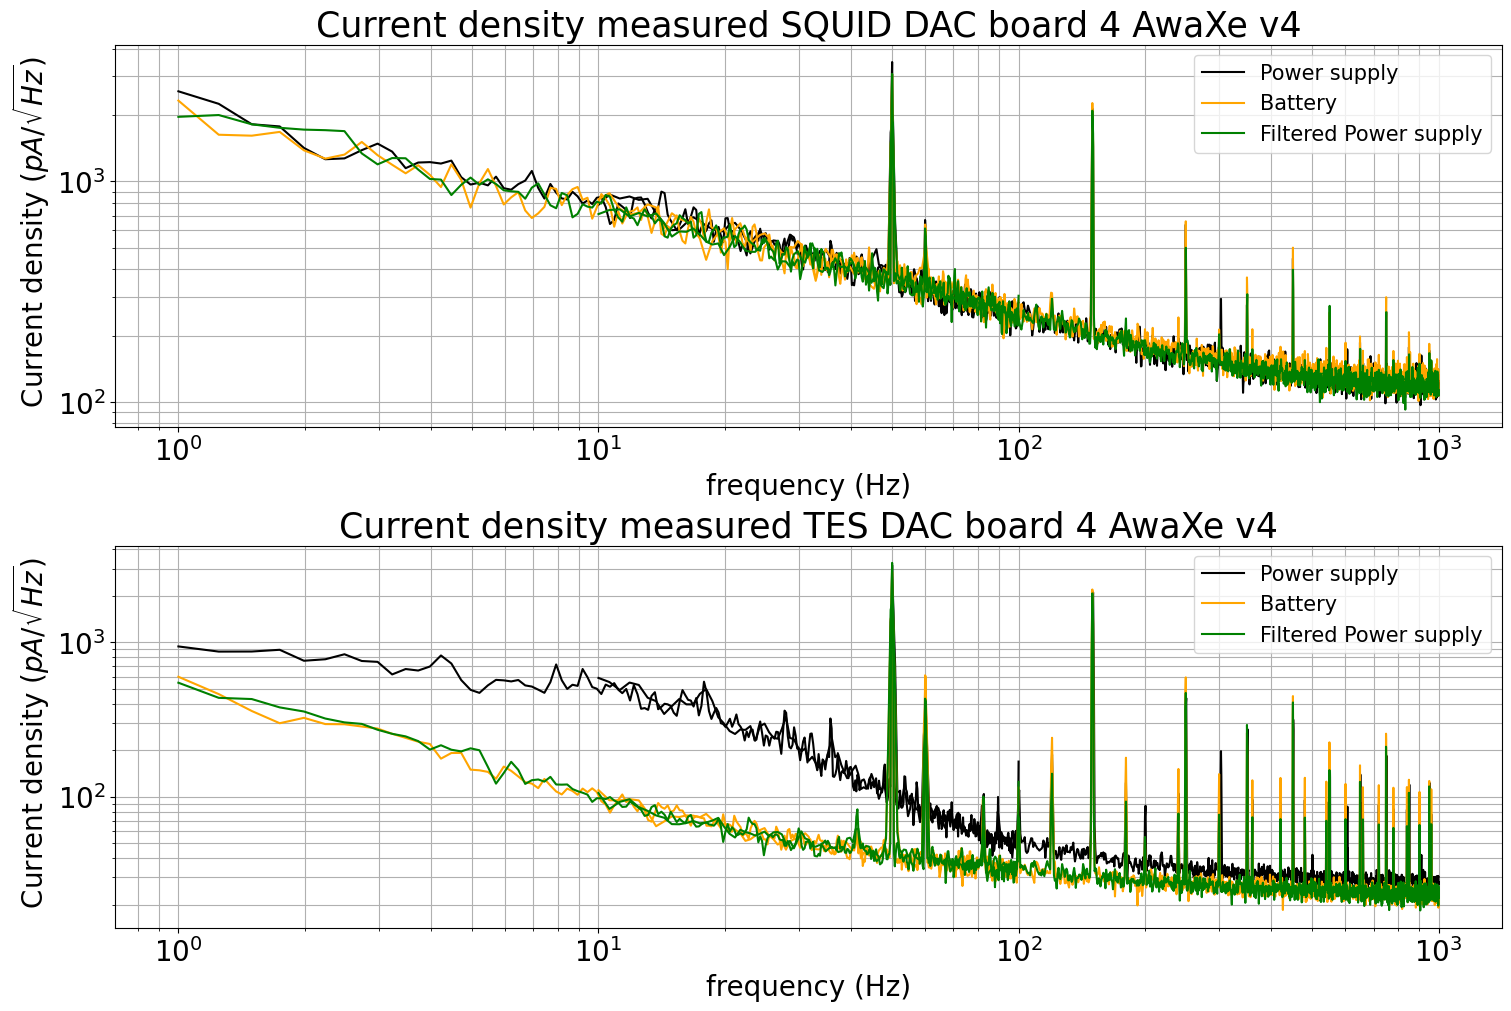

In [31]:
factor = 1e12/(510*1000)
plt.figure(figsize = (15,10), constrained_layout=True)
plt.subplot(211)
plt.loglog(S4LFPS[:,0], S4LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(S4HFPS[:,0], S4HFPS[:,1]*factor, color = color[0] )
plt.loglog(S4LFBA[:,0], S4LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(S4HFBA[:,0], S4HFBA[:,1]*factor, color = color[1] )
plt.loglog(S4LFFF[:,0], S4LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(S4HFFF[:,0], S4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured SQUID DAC board 4 AwaXe v4',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.subplot(212)
plt.loglog(T4LFPS[:,0], T4LFPS[:,1]*factor, color = color[0], label = 'Power supply' )
plt.loglog(T4HFPS[:,0], T4HFPS[:,1]*factor, color = color[0] )
plt.loglog(T4LFBA[:,0], T4LFBA[:,1]*factor, color = color[1], label = 'Battery' )
plt.loglog(T4HFBA[:,0], T4HFBA[:,1]*factor, color = color[1] )
plt.loglog(T4LFFF[:,0], T4LFFF[:,1]*factor, color = color[2], label = 'Filtered Power supply' )
plt.loglog(T4HFFF[:,0], T4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured TES DAC board 4 AwaXe v4',fontsize = 25) 
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('DAC_SQUID_TES_v4_board4.png')

In [32]:
#extra result 
#noise squid

S3LFFF = np.genfromtxt('dat1/B3LFFF.TXT')
S3HFFF = np.genfromtxt('dat1/B3HFFF.TXT')

# Tesla with filter  

S1LFFF = np.genfromtxt('dat1/S1LFFF.TXT')
S1HFFF = np.genfromtxt('dat1/S1HFFF.TXT')


# Edison 

S4LFFF = np.genfromtxt('dat1/S4LFFF.TXT')
S4HFFF = np.genfromtxt('dat1/S4HFFF.TXT')

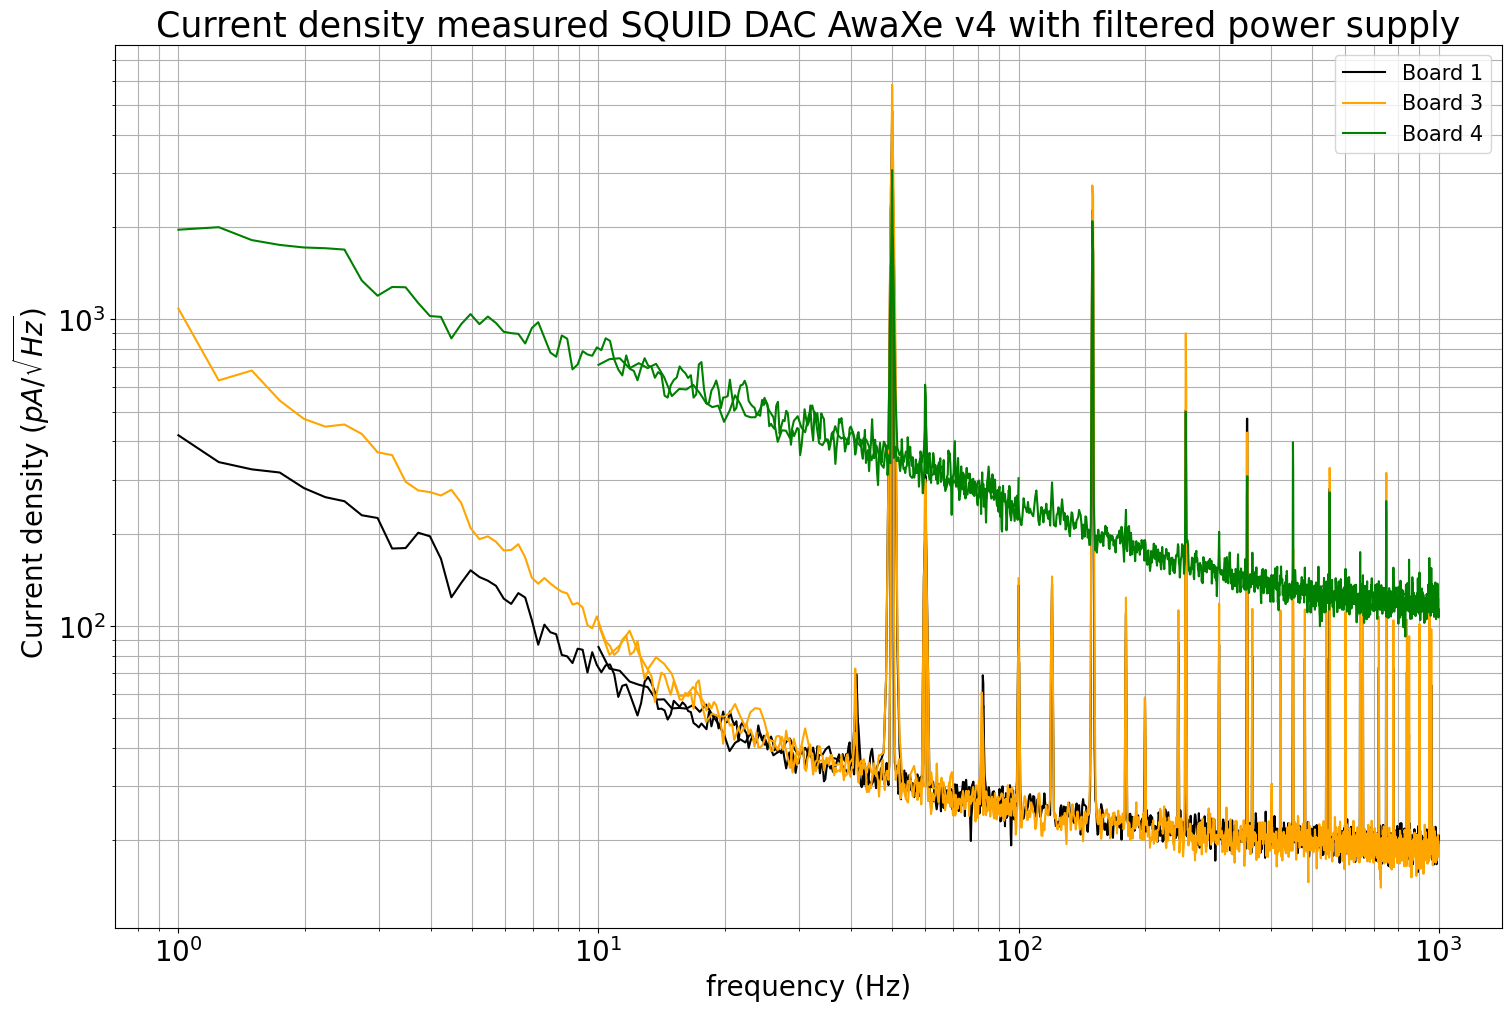

In [33]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)
plt.loglog(S1LFFF[:,0], S1LFFF[:,1]*factor, color = color[0], label = 'Board 1' )
plt.loglog(S1HFFF[:,0], S1HFFF[:,1]*factor, color = color[0] )
plt.loglog(S3LFFF[:,0], S3LFFF[:,1]*factor, color = color[1], label = 'Board 3' )
plt.loglog(S3HFFF[:,0], S3HFFF[:,1]*factor, color = color[1] )
plt.loglog(S4LFFF[:,0], S4LFFF[:,1]*factor, color = color[2], label = 'Board 4' )
plt.loglog(S4HFFF[:,0], S4HFFF[:,1]*factor, color = color[2] )
plt.gca().set_title('Current density measured SQUID DAC AwaXe v4 with filtered power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('DAC_SQUID_DAC_v4.png')

## AwaXe v4.5

### Read data (Board 3)  (Biased with power supply)

In [34]:
### TES_LF
TES1_LF = np.genfromtxt('v4.5/345T1LPS.TXT') 
TES2_LF = np.genfromtxt('v4.5/345T2LPS.TXT') 

### TES_HF
TES1_HF = np.genfromtxt('v4.5/345T1HPS.TXT') 
TES2_HF = np.genfromtxt('v4.5/345T2HPS.TXT')

### SQUID_LF
SQI1_LF = np.genfromtxt('v4.5/345S1LPS.TXT') 
SQI2_LF = np.genfromtxt('v4.5/345S2LPS.TXT')

### SQUID_HF
SQI1_HF = np.genfromtxt('v4.5/345S1HPS.TXT') 
SQI2_HF = np.genfromtxt('v4.5/345S2HPS.TXT')

### TES2_UF
TES2_UF = np.genfromtxt('v4.5/345T2UPS.TXT') 

### SQID2_UF
SQI2_UF = np.genfromtxt('v4.5/345S2UPS.TXT') 

### DATA to try compare 
SPECTRO_TES2 = np.genfromtxt('v4.5/CMPT2HPS.TXT')
SPECTRO_SQI2 = np.genfromtxt('v4.5/CMPS2HPS.TXT')

OSCILLO_TES2 = pd.read_csv('v4.5/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2 = pd.read_csv('v4.5/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

In [35]:
print(OSCILLO_TES2)

              0
0      0.004235
1      0.004479
2      0.003228
3      0.007397
4      0.002165
...         ...
79995  0.008140
79996  0.003604
79997  0.005731
79998  0.005148
79999  0.000462

[80000 rows x 1 columns]


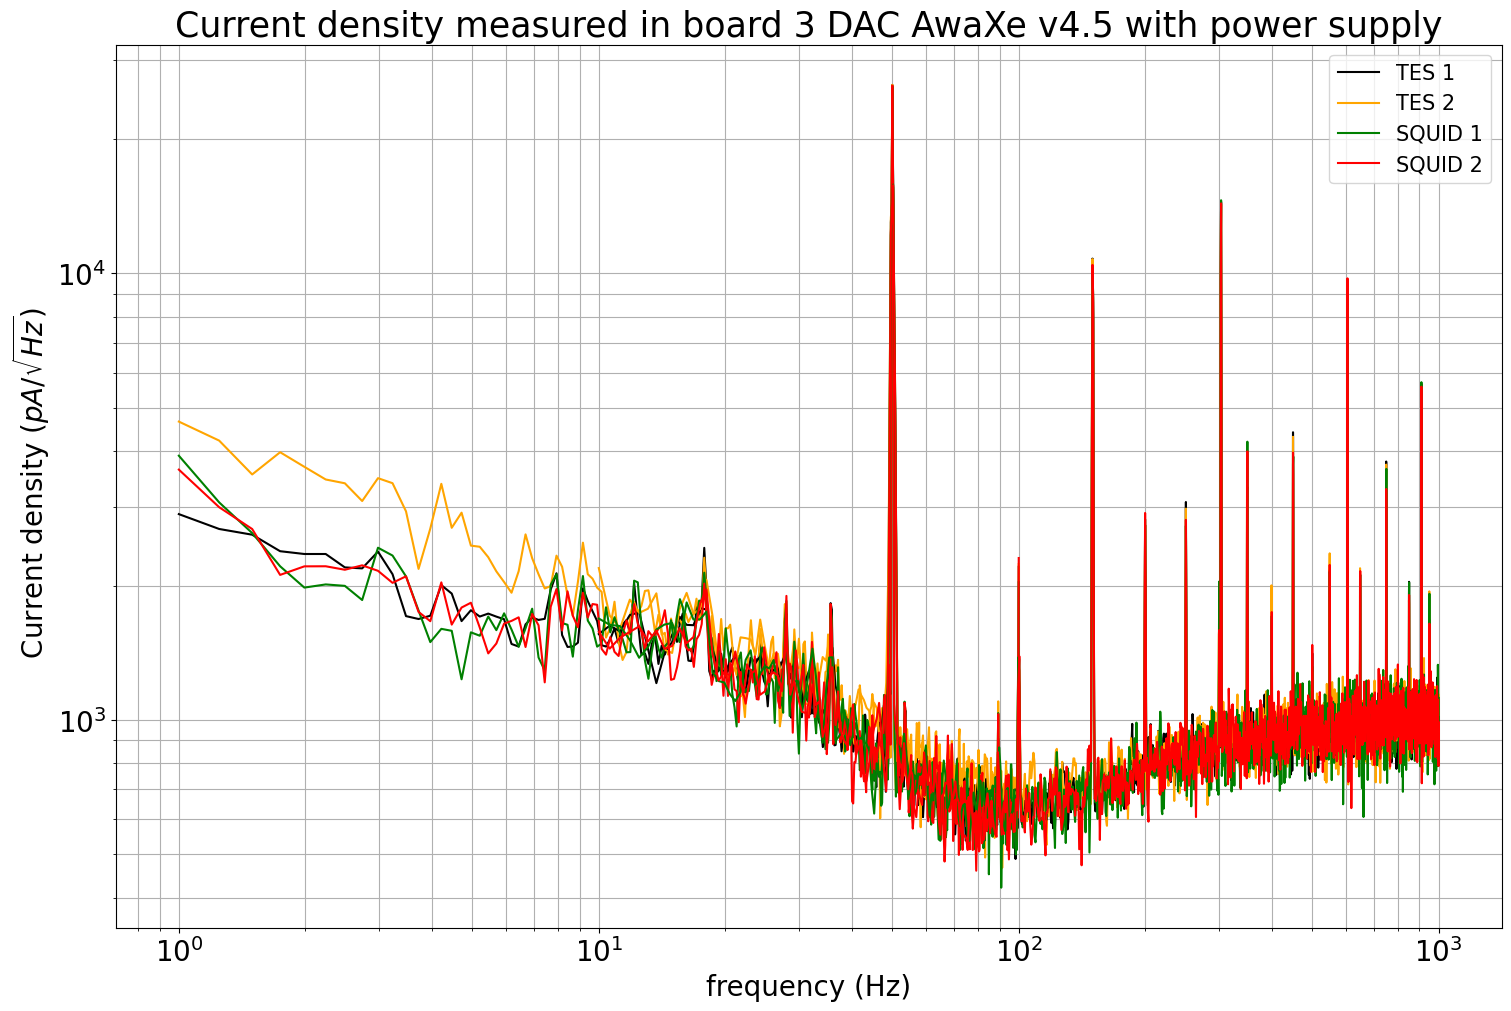

In [36]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('board3_v4.5_TES12_SQUID12.png')

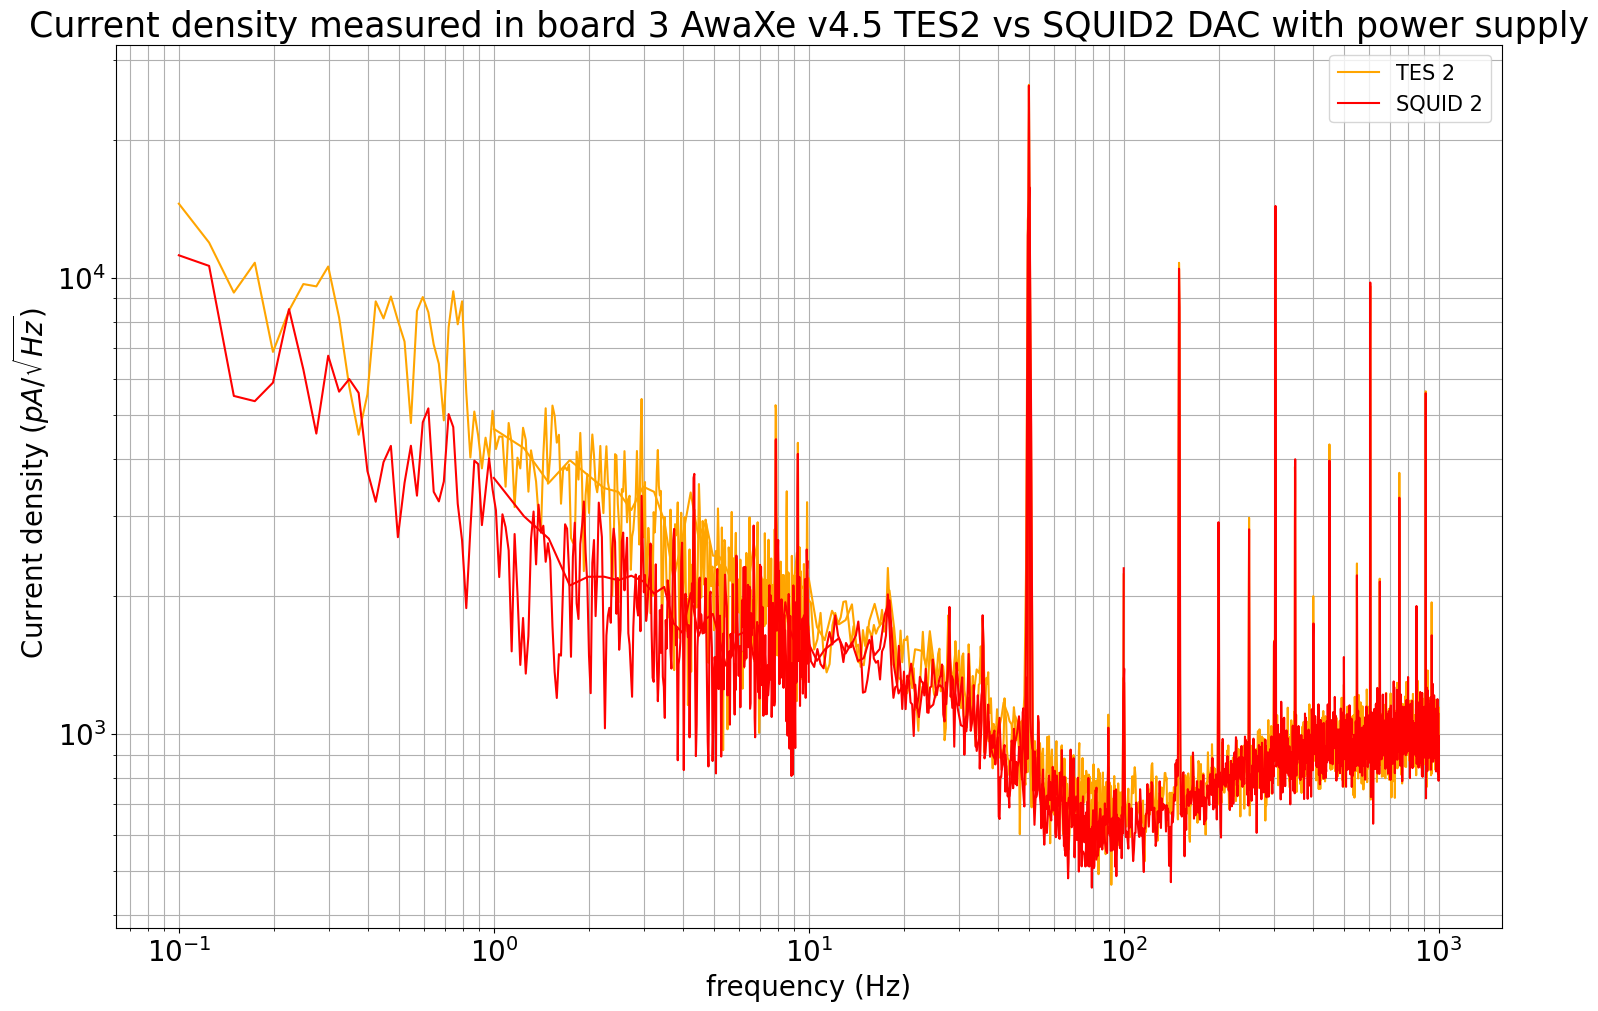

In [37]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)
#TES_UF 
plt.loglog(TES2_UF[:,0], TES2_UF[:,1]*factor, color = color[1])
#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQID_UF 
plt.loglog(SQI2_UF[:,0], SQI2_UF[:,1]*factor, color = color[3] )
#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('board3_v4.5_TES2_SQUID2_ultralownoise.png')

In [38]:
def compute_power_spectral_density(signal, sample_rate, nperseg, bandwidth):
    from scipy.signal import welch
    from scipy.signal.windows import hann
    """
    Computes the Power Spectral Density (PSD) of a given signal using Welch's method,
    considering the bandwidth of the oscilloscope.

    Parameters:
    signal (numpy array): The input signal.
    sample_rate (float): The sampling rate of the signal (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).
    bandwidth (float): Bandwidth of the oscilloscope (in Hz).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    psd (numpy array): Power Spectral Density at each frequency.
    """

    # Apply a Hanning window to the signal
    window = hann(nperseg)
    signal = signal * window

    # Compute the Power Spectral Density using Welch's method
    freq, psd = welch(signal, sample_rate, nperseg=nperseg)

    # Consider the oscilloscope's bandwidth
    valid_indices = freq <= bandwidth / 2  # Keep only frequencies within bandwidth
    freq = freq[valid_indices]
    psd = psd[valid_indices]

    return freq, psd

In [39]:
# from scipy.signal import welch 
# from scipy.signal.windows import hann 
# ?welch

In [40]:
sample_rate = 20000
ft1,val1 = compute_power_spectral_density(OSCILLO_TES2[0]*factor, sample_rate, 80000, 20e6)
ft2,val2 = compute_power_spectral_density(OSCILLO_SQI2[0]*factor, sample_rate, 80000, 20e6)

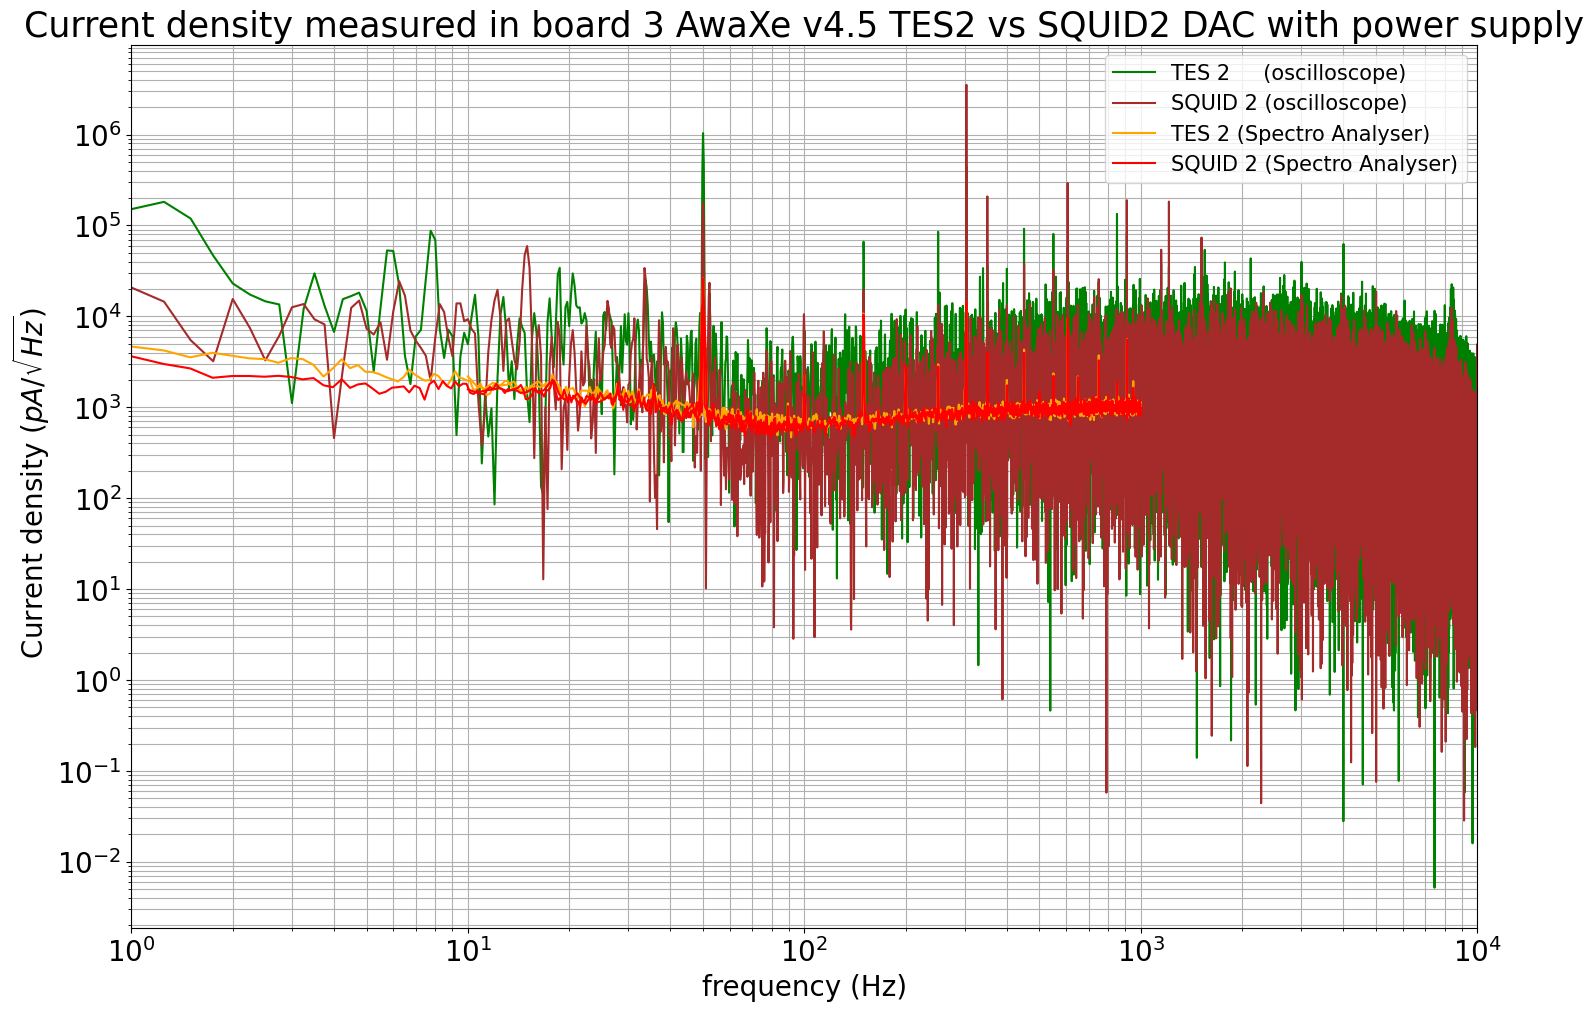

In [41]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

# #TES_LF 
# plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2' )
# #TES_HF 
# plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

# #SQUID_LF 
# plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
# #SQUID_HF 
# plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

#Oscilloscope 
plt.loglog(ft1,val1, color = color[2], label = 'TES 2     (oscilloscope)')
plt.loglog(ft2,val2, color = color[4], label = 'SQUID 2 (oscilloscope)')

#TES_LF 
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 (Spectro Analyser)' )
#TES_HF 
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )

#SQUID_LF 
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 (Spectro Analyser)' )
#SQUID_HF 
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 AwaXe v4.5 TES2 vs SQUID2 DAC with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.xlim(1,1e4)
plt.savefig('spectrum_compare.png')

### Read data (board 3) (Biased with batteries)

In [42]:
### TES_LF
TES1BA_LF = np.genfromtxt('v4.5_20122024/345T1LBA.TXT') 
TES2BA_LF = np.genfromtxt('v4.5_20122024/345T2LBA.TXT') 
TES1BA_HF = np.genfromtxt('v4.5_20122024/345T1HBA.TXT') 
TES2BA_HF = np.genfromtxt('v4.5_20122024/345T2HBA.TXT')
SQI1BA_LF = np.genfromtxt('v4.5_20122024/345S1LBA.TXT') 
SQI2BA_LF = np.genfromtxt('v4.5_20122024/345S2LBA.TXT')
SQI1BA_HF = np.genfromtxt('v4.5_20122024/345S1HBA.TXT') 
SQI2BA_HF = np.genfromtxt('v4.5_20122024/345S2HBA.TXT')
TES2BA_UF = np.genfromtxt('v4.5_20122024/345T2UBA.TXT')
TES2BA_UF = np.genfromtxt('v4.5_20122024/345T2UBA.TXT') 
SQI2BA_UF = np.genfromtxt('v4.5_20122024/345S2UBA.TXT') 
TES1BA_UF = np.genfromtxt('v4.5_20122024/345T1UBA.TXT') 
SQI1BA_UF = np.genfromtxt('v4.5_20122024/345S1UBA.TXT') 
# ### DATA to try compare 
# SPECTRO_TES2 = np.genfromtxt('v4.5/CMPT2HPS.TXT')
# SPECTRO_SQI2 = np.genfromtxt('v4.5/CMPS2HPS.TXT')

# OSCILLO_TES2 = pd.read_csv('v4.5/cmpt2hps.Wfm.csv', skiprows=0, header=None) # No header
# OSCILLO_SQI2 = pd.read_csv('v4.5/cmps2hps.Wfm.csv', skiprows=0, header=None) # No header

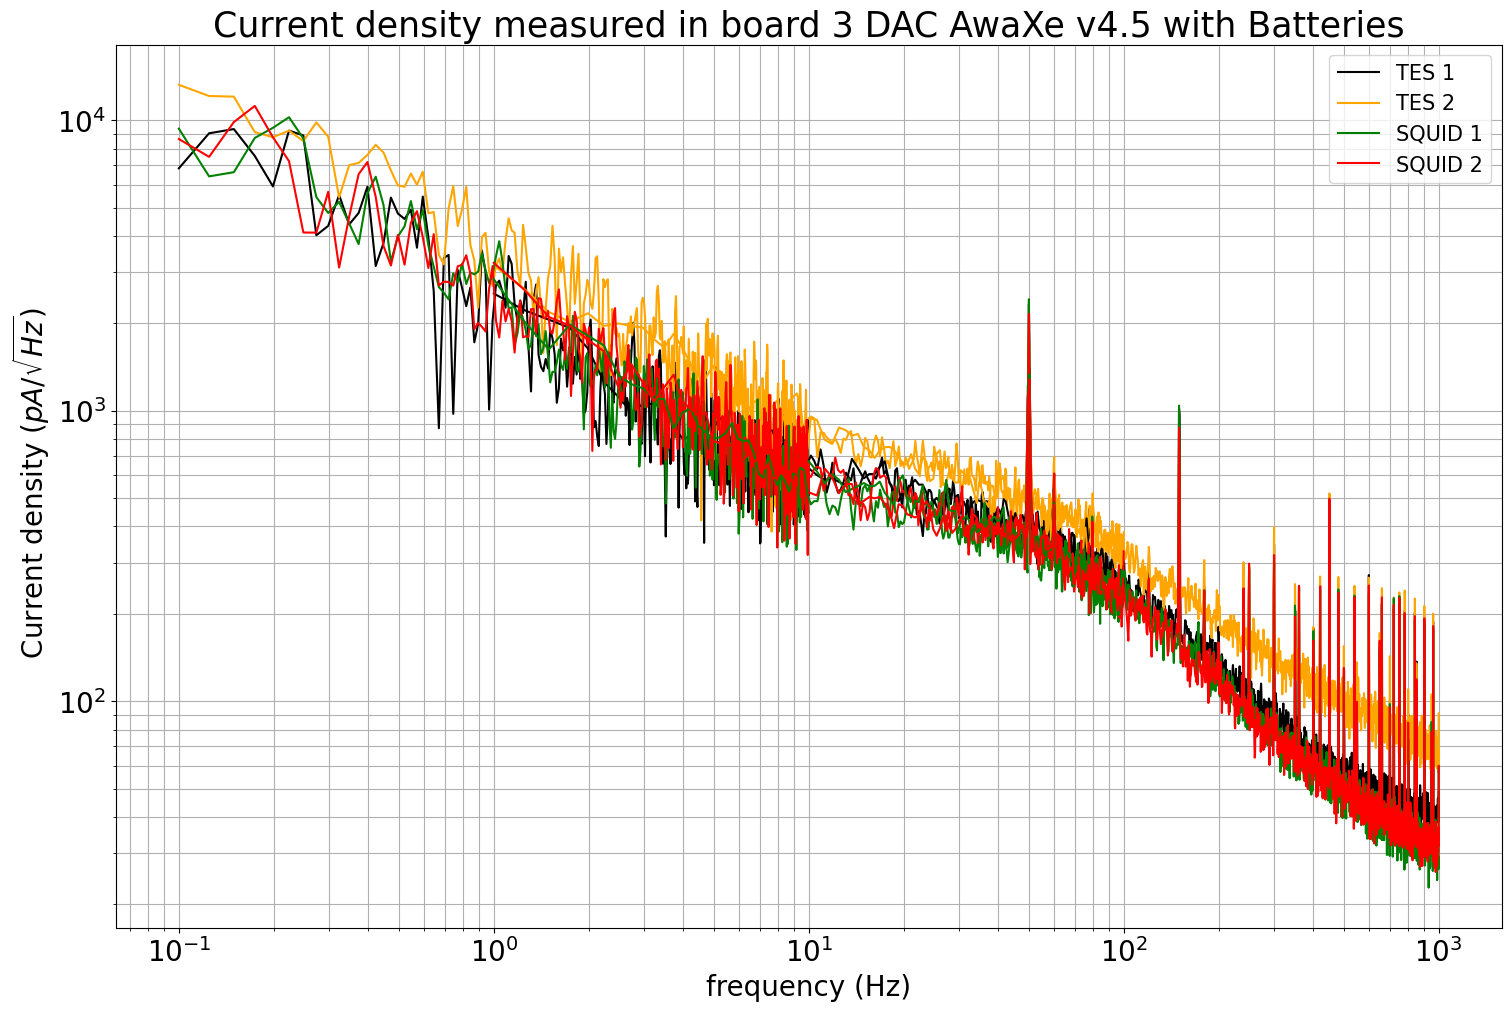

In [43]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_UF[:,0], TES1BA_UF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_UF[:,0], TES2BA_UF[:,1]*factor, color = color[1] )
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor, color = color[1], label = 'TES 2' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor, color = color[1] )

plt.loglog(SQI1BA_UF[:,0], SQI1BA_UF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_UF[:,0], SQI2BA_UF[:,1]*factor, color = color[3] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor, color = color[3] )



plt.gca().set_title('Current density measured in board 3 DAC AwaXe v4.5 with Batteries',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

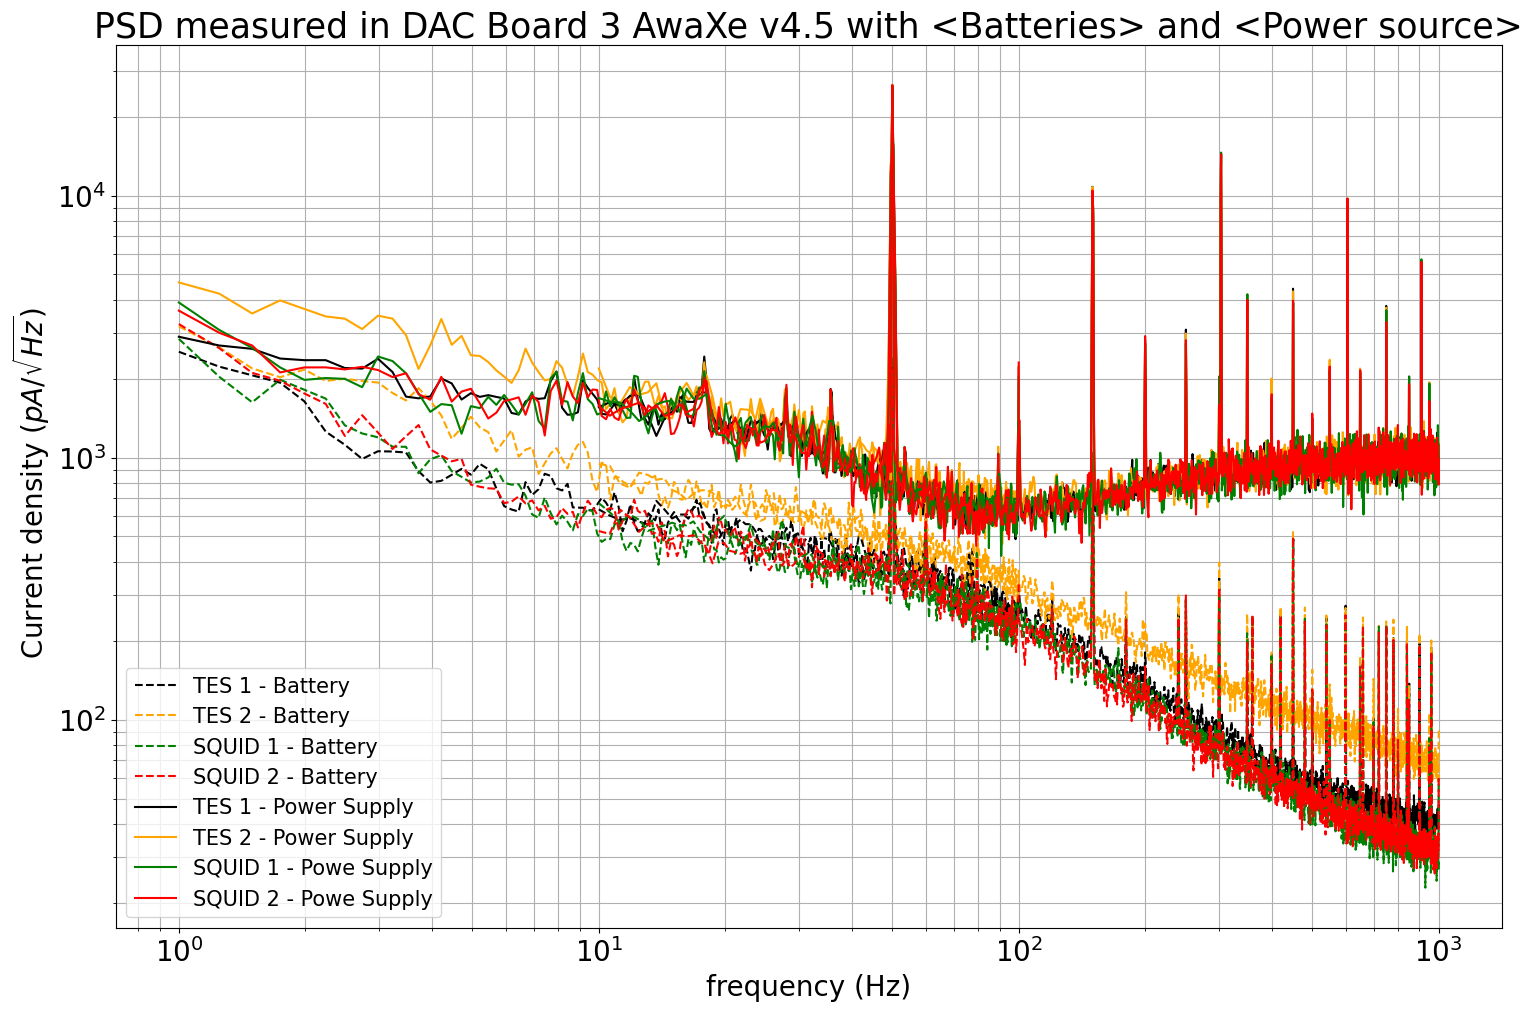

In [44]:
plt.figure(figsize = (15,10), constrained_layout=True)
# plt.subplot(211)

#TES_LF 
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[0], label = 'TES 1 - Battery' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[1], label = 'TES 2 - Battery' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[1] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[2], label = 'SQUID 1 - Battery' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[3], label = 'SQUID 2 - Battery' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[3] )

#------

#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - Power Supply' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - Power Supply' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - Powe Supply' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - Powe Supply' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )

plt.gca().set_title('PSD measured in DAC Board 3 AwaXe v4.5 with <Batteries> and <Power source>',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### Oscilloscope data with v4.5 board 3 (with battery)

In [45]:
### Oscilloscope 

OSCILLO_TES2BA = pd.read_csv('v4.5_20122024/345t2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI2BA = pd.read_csv('v4.5_20122024/345s2ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_TES1BA = pd.read_csv('v4.5_20122024/345t1ba.Wfm.csv', skiprows=0, header=None) # No header
OSCILLO_SQI1BA = pd.read_csv('v4.5_20122024/345s1ba.Wfm.csv', skiprows=0, header=None) # No header

In [46]:
OSCILLO_analyse = [OSCILLO_TES1BA,
OSCILLO_TES2BA,
OSCILLO_SQI1BA,
OSCILLO_SQI2BA]

In [65]:
# print(OSCILLO_TES1BA[0])

0         0.001897
1         0.002055
2         0.000949
3        -0.000237
4         0.000395
            ...   
399995   -0.000791
399996   -0.001423
399997    0.000158
399998    0.002134
399999    0.001897
Name: 0, Length: 400000, dtype: float64


In [57]:
# def compute_power_spectral_density(signal, sample_rate, nperseg, bandwidth):
#     from scipy.signal import welch
#     from scipy.signal.windows import hann
#     """
#     Computes the Power Spectral Density (PSD) of a given signal using Welch's method,
#     considering the bandwidth of the oscilloscope.

#     Parameters:
#     signal (numpy array): The input signal.
#     sample_rate (float): The sampling rate of the signal (in Hz).
#     nperseg (int, optional): Length of each segment for Welch's method (default is 256).
#     bandwidth (float): Bandwidth of the oscilloscope (in Hz).

#     Returns:
#     freq (numpy array): Frequencies at which the PSD is computed.
#     psd (numpy array): Power Spectral Density at each frequency.
#     """

#     # Apply a Hanning window to the signal
#     window = hann(len(signal))
    
#     signal = np.array(signal) * window

#     # Compute the Power Spectral Density using Welch's method
#     freq, psd = welch(signal, sample_rate, nperseg=nperseg)

#     # Consider the oscilloscope's bandwidth
#     valid_indices = freq <= bandwidth / 2  # Keep only frequencies within bandwidth
#     freq = freq[valid_indices]
#     psd = psd[valid_indices]

#     return freq, psd

# def fourier_transform_et_PSD(signal, sampling_rate, BW):
#   """
#   Calculates the Fourier Transform of a signal and returns 
#   the frequencies and FFT values in the positive domain.

#   Args:
#     signal: The input signal (a 1D NumPy array).
#     sampling_rate: The sampling rate of the signal in Hz.

#   Returns:
#     A tuple containing:
#       - positive_frequencies: An array of positive frequencies.
#       - positive_fft_values: The corresponding FFT values.
#   """
#   signal = signal / BW
#   fft_values = np.fft.fft(signal)
#   frequencies = np.fft.fftfreq(len(signal), 1/sampling_rate)

#   # Select only the positive frequencies and their corresponding FFT values
#   positive_frequencies = frequencies[frequencies >= 0]
#   positive_fft_values = fft_values[frequencies >= 0]

#   return positive_frequencies, positive_fft_values
def PSD_avg(data, Fs, BW, nperseg):  # Added nperseg argument
    """
    Computes the average Power Spectral Density (PSD) of a given signal 
    over multiple segments.

    Parameters:
    data (numpy array): The input signal.
    Fs (float): The sampling rate of the signal (in Hz).
    BW (float): Bandwidth of the oscilloscope (in Hz).
    nperseg (int, optional): Length of each segment for Welch's method (default is 256).

    Returns:
    freq (numpy array): Frequencies at which the PSD is computed.
    avg_psd (numpy array): Average Power Spectral Density at each frequency.
    """
    L = len(data)
    n = int(L / Fs) 
    # print(n)
    psd_sum = np.zeros(L // n // 2 +1)  # Initialize array to store PSD sum
    print(np.size(psd_sum))
    count = 0
    for i in range(n):
        # print(i)
        fre, val = compute_power_spectral_density(data[count:count + Fs], Fs, nperseg, BW)
        psd_sum += val 
        count += Fs

    avg_psd = psd_sum / n
    return fre, avg_psd  # Return the frequency array from the last segment
        



In [48]:
# def PSD_avg_plot(data, Fs, BW, nperseg):  # Added nperseg argument
#     """
#     Computes the average Power Spectral Density (PSD) of a given signal 
#     over multiple segments.

#     Parameters:
#     data (numpy array): The input signal.
#     Fs (float): The sampling rate of the signal (in Hz).
#     BW (float): Bandwidth of the oscilloscope (in Hz).
#     nperseg (int, optional): Length of each segment for Welch's method (default is 256).

#     Returns:
#     freq (numpy array): Frequencies at which the PSD is computed.
#     avg_psd (numpy array): Average Power Spectral Density at each frequency.
#     """
#     L = len(data)
#     n = int(L / Fs) 
#     # print(n)
#     psd_sum = np.zeros(L // n // 2 +1)  # Initialize array to store PSD sum
#     print(np.size(psd_sum))
#     count = 0
#     for i in range(n):
#         # print(i)
#         # print(count)
#         # time = np.linspace(-1,1, Fs)
#         # plt.plot(time, data[count:count + Fs])
#         fre, val = compute_power_spectral_density(data[count:count + Fs], Fs, nperseg, BW)
#         # plt.loglog(fre,val, label = f'WF {i}')
#         psd_sum += val 
#         count += Fs

#     avg_psd = psd_sum / n
#     return fre, avg_psd  # Return the frequency array from the last segment
        

In [49]:
# # plt.figure(figsize = (15,10))
# # plt.plot(OSCILLO_TES1BA[0])
# import matplotlib.pyplot as plt
# import numpy as np

# Fs = 20000
# BW = 20e6
# count = 0
# n = 20

# plt.figure(figsize=(15, 10))

# # Create the x-axis values (time)
# time = np.arange(0, Fs) / Fs  # Time values for one waveform

# for i in range(n):
#     # print(count)
#     print(i)
#     plt.plot(time, data[count:count + Fs], label=f'WF {i}')  # Plot with time
#     count += Fs

# plt.grid()
# plt.legend()
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Overlapping Waveforms")
# plt.show()
#     # psd_sum += val 
    

10001
200001


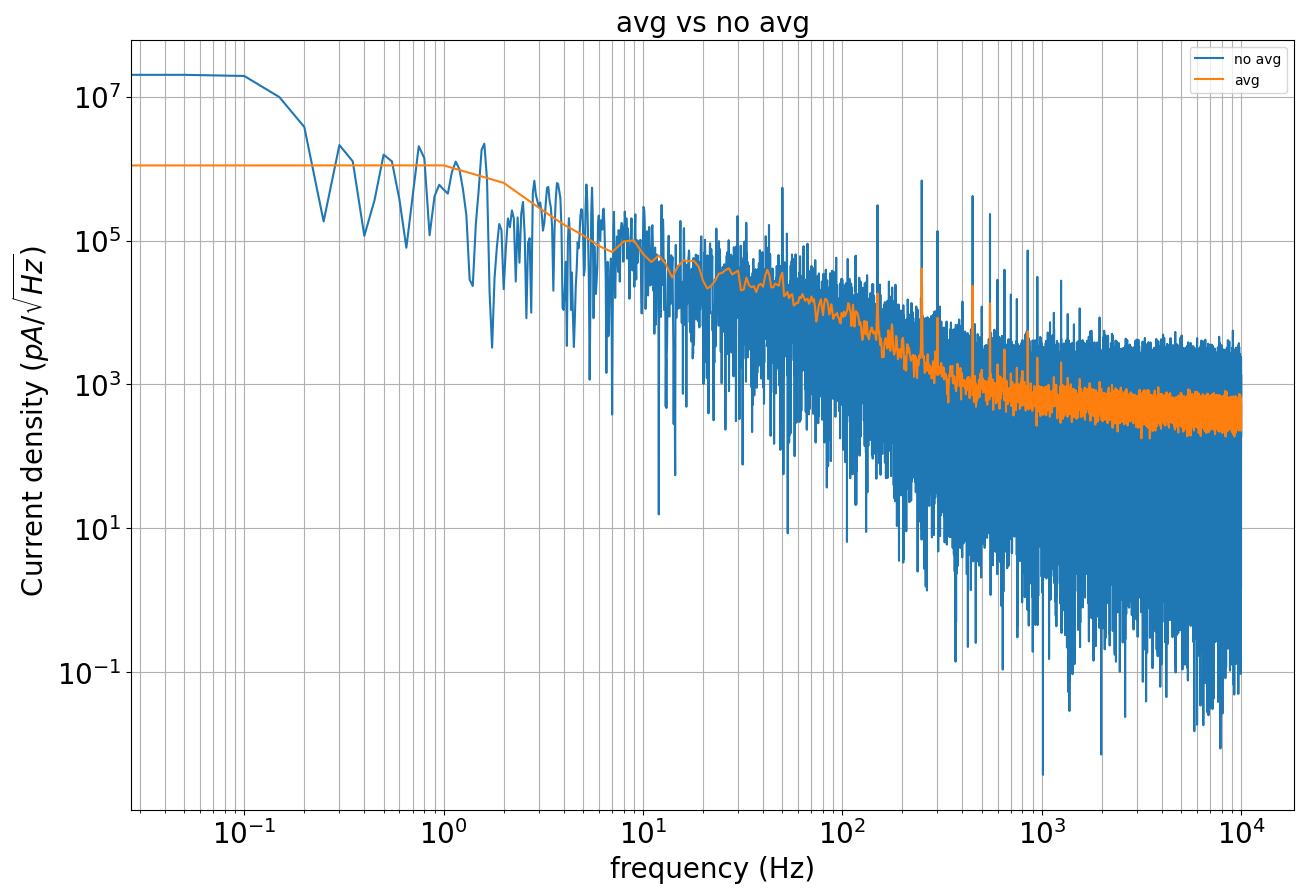

In [74]:
Fs = 20000
BW = 20e6

f_avg,va_avg = PSD_avg(OSCILLO_TES1BA[0]                      *factor, Fs, BW, 20000)
f_noavg, va_noavg = compute_power_spectral_density(OSCILLO_TES1BA[0]*factor, Fs, len(OSCILLO_TES1BA[0]), BW)
print(len(va_noavg))
plt.figure(figsize = (15,10))
plt.title('avg vs no avg', fontsize = 20)
plt.loglog(f_noavg, va_noavg, label = 'no avg')
plt.loglog(f_avg, va_avg, label = 'avg')
# plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor, color = color[1] )
# plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor, color = color[1], label = 'TES 2 ' )
# plt.loglog(f,va)
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.legend()

10001
10001
10001
10001


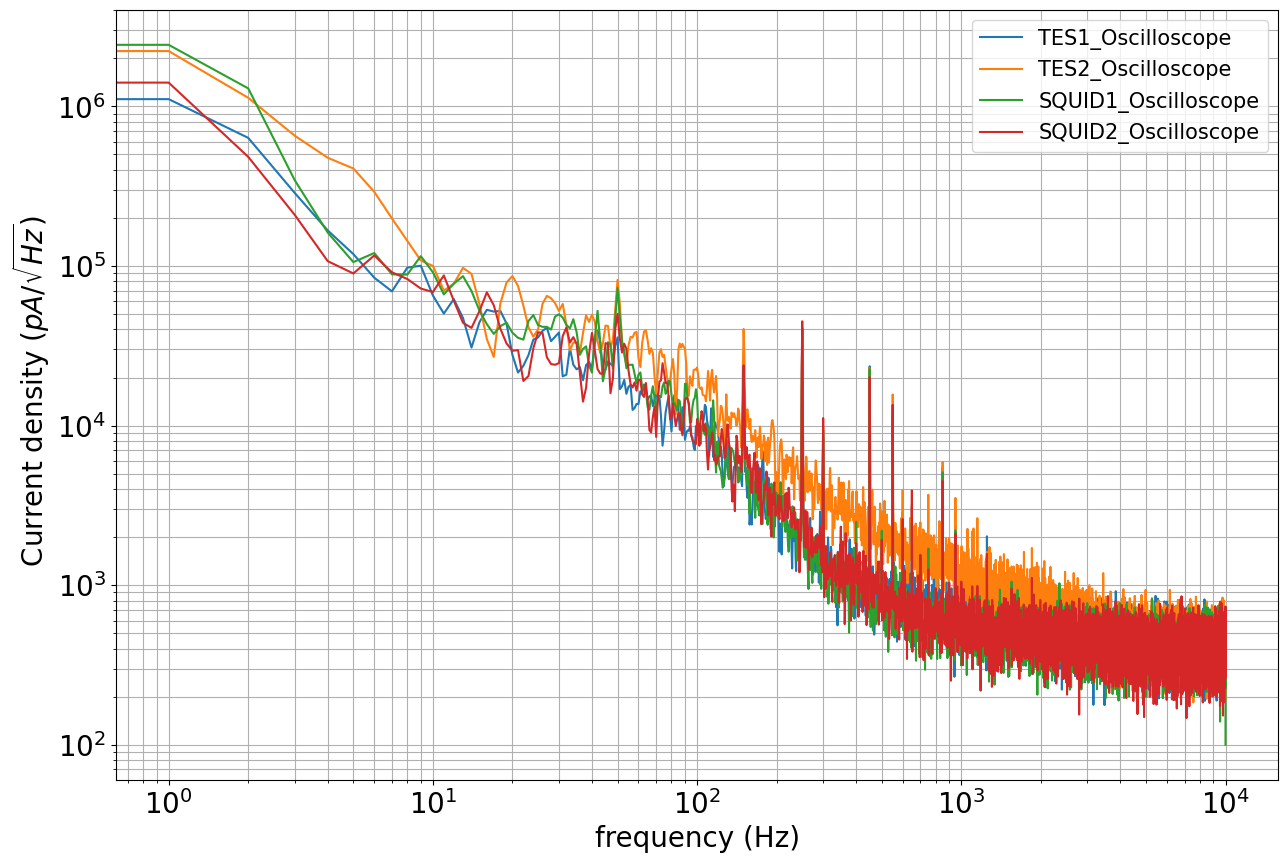

In [75]:
name = [  'TES1_Oscilloscope'
        , 'TES2_Oscilloscope'
        , 'SQUID1_Oscilloscope'
        , 'SQUID2_Oscilloscope']
plt.figure(figsize = (15,10))
for i in range(len(OSCILLO_analyse)):
    f,va = PSD_avg(OSCILLO_analyse[i][0]*factor, Fs, BW, 20000)
    plt.loglog(f,va, label = f'{name[i]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### Compare plot between Spectral analyser and Oscilloscope (board 3 v4.5 with battery)

10001
10001
10001
10001


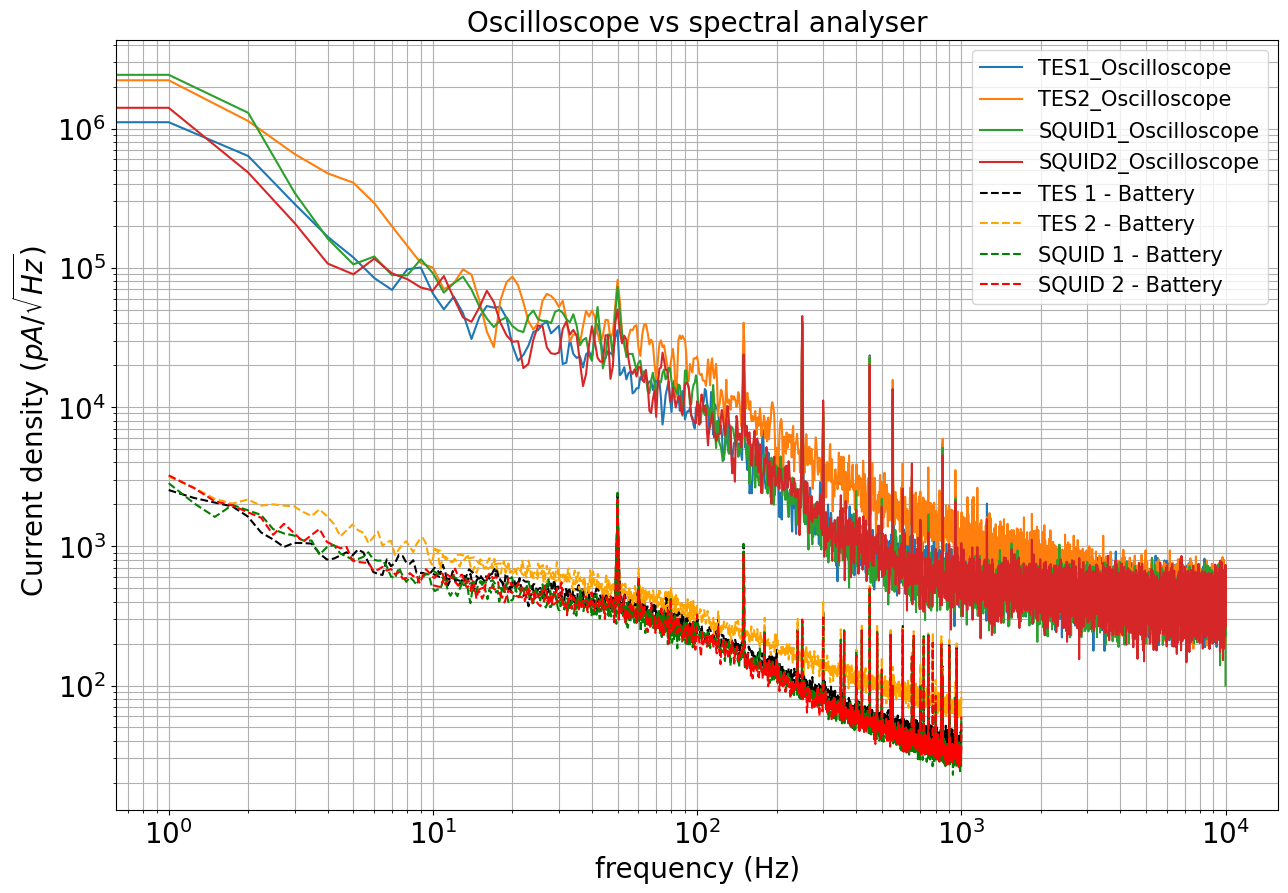

In [76]:
plt
plt.figure(figsize = (15,10))
plt.title('Oscilloscope vs spectral analyser', fontsize = 20)
for i in range(len(OSCILLO_analyse)):
    f,va = PSD_avg(OSCILLO_analyse[i][0]*factor, Fs, BW, 20000)
    plt.loglog(f,va, label = f'{name[i]}')
#TES_LF 
plt.loglog(TES1BA_LF[:,0], TES1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[0], label = 'TES 1 - Battery' )
plt.loglog(TES2BA_LF[:,0], TES2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[1], label = 'TES 2 - Battery' )
plt.loglog(TES1BA_HF[:,0], TES1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[0] )
plt.loglog(TES2BA_HF[:,0], TES2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[1] )
plt.loglog(SQI1BA_LF[:,0], SQI1BA_LF[:,1]*factor,linestyle = 'dashed', color = color[2], label = 'SQUID 1 - Battery' )
plt.loglog(SQI2BA_LF[:,0], SQI2BA_LF[:,1]*factor,linestyle = 'dashed', color = color[3], label = 'SQUID 2 - Battery' )
plt.loglog(SQI1BA_HF[:,0], SQI1BA_HF[:,1]*factor,linestyle = 'dashed', color = color[2] )
plt.loglog(SQI2BA_HF[:,0], SQI2BA_HF[:,1]*factor,linestyle = 'dashed', color = color[3] )
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

## CMB S4 Board 3

In [ ]:
### TES_LF
CMB_TES1PS_LF = np.genfromtxt('cmbs4_20122024/CMBT0LPS.TXT') 
CMB_TES2PS_LF = np.genfromtxt('cmbs4_20122024/CMBT1LPS.TXT') 

CMB_TES1PS_HF = np.genfromtxt('cmbs4_20122024/CMBT0HPS.TXT') 
CMB_TES2PS_HF = np.genfromtxt('cmbs4_20122024/CMBT1HPS.TXT')

CMB_SQI1PS_LF = np.genfromtxt('cmbs4_20122024/CMBS0LPS.TXT') 
CMB_SQI2PS_LF = np.genfromtxt('cmbs4_20122024/CMBS1LPS.TXT')

CMB_SQI1PS_HF = np.genfromtxt('cmbs4_20122024/CMBS0HPS.TXT') 
CMB_SQI2PS_HF = np.genfromtxt('cmbs4_20122024/CMBS1HPS.TXT')

CMB_SQI1PS_UF = np.genfromtxt('cmbs4_20122024/CMBS0UPS.TXT')
CMB_TES2PS_UF = np.genfromtxt('cmbs4_20122024/CMBT1UPS.TXT')

CMB_SQI2PS_UF = np.genfromtxt('cmbs4_20122024/CMBS1UPS.TXT') 
CMB_TES1PS_UF = np.genfromtxt('cmbs4_20122024/CMBT0UPS.TXT') 

 

In [ ]:
#TES_LF 
plt.figure(figsize = (15,10), constrained_layout=True)
plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, color = color[0], label = 'TES 1' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, color = color[1], label = 'TES 2' )

plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, color = color[1] )

plt.loglog(CMB_SQI1PS_UF[:,0], CMB_SQI1PS_UF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_UF[:,0], CMB_SQI2PS_UF[:,1]*factor, color = color[3] )

plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, color = color[2], label = 'SQUID 1' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, color = color[3], label = 'SQUID 2' )

plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, color = color[3] )


plt.gca().set_title('Current density measured in board 3 DAC CMBS4 with power supply',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('CMBS4noise_powersupply.png')

In [ ]:
plt.figure(figsize = (15,10), constrained_layout=True)
#TES_LF 
plt.loglog(TES1_LF[:,0], TES1_LF[:,1]*factor, color = color[0], label = 'TES 1 - AwaXe v4.5' )
plt.loglog(TES2_LF[:,0], TES2_LF[:,1]*factor, color = color[1], label = 'TES 2 - AwaXe v4.5' )
#TES_HF 
plt.loglog(TES1_HF[:,0], TES1_HF[:,1]*factor, color = color[0] )
plt.loglog(TES2_HF[:,0], TES2_HF[:,1]*factor, color = color[1] )
#SQUID_LF 
plt.loglog(SQI1_LF[:,0], SQI1_LF[:,1]*factor, color = color[2], label = 'SQUID 1 - AwaXe v4.5' )
plt.loglog(SQI2_LF[:,0], SQI2_LF[:,1]*factor, color = color[3], label = 'SQUID 2 - AwaXe v4.5' )
#SQUID_HF 
plt.loglog(SQI1_HF[:,0], SQI1_HF[:,1]*factor, color = color[2] )
plt.loglog(SQI2_HF[:,0], SQI2_HF[:,1]*factor, color = color[3] )



# plt.loglog(CMB_TES1PS_UF[:,0], CMB_TES1PS_UF[:,1]*factor, color = color[0] )
# plt.loglog(CMB_TES2PS_UF[:,0], CMB_TES2PS_UF[:,1]*factor, color = color[1] )

plt.loglog(CMB_TES1PS_LF[:,0], CMB_TES1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[0], label = 'TES 1 - CMBS4 v3' )
plt.loglog(CMB_TES2PS_LF[:,0], CMB_TES2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[1], label = 'TES 2 - CMBS4 v3' )
plt.loglog(CMB_TES1PS_HF[:,0], CMB_TES1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[0] )
plt.loglog(CMB_TES2PS_HF[:,0], CMB_TES2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[1] )
plt.loglog(CMB_SQI1PS_LF[:,0], CMB_SQI1PS_LF[:,1]*factor, linestyle = 'dashed', color = color[2], label = 'SQUID 1 - CMBS4 v3' )
plt.loglog(CMB_SQI2PS_LF[:,0], CMB_SQI2PS_LF[:,1]*factor, linestyle = 'dashed', color = color[3], label = 'SQUID 2 - CMBS4 v3' )
plt.loglog(CMB_SQI1PS_HF[:,0], CMB_SQI1PS_HF[:,1]*factor, linestyle = 'dashed', color = color[2] )
plt.loglog(CMB_SQI2PS_HF[:,0], CMB_SQI2PS_HF[:,1]*factor, linestyle = 'dashed', color = color[3] )


plt.gca().set_title('AwaXe v4.5 vs CMBS4 v3',fontsize = 25)
# plt.loglog(fre, np.sqrt(avg[n]/10), label = f'Board {num[n]}')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.savefig('AWaXev4.5vsCMBS4v3.png')



# Appendix

## Plot other noise

### DACv4.5board2 measure 1

In [ ]:
data = pd.read_csv('06112024/C1--dacv45bord2--00000.csv', skiprows=9, header=None) # No header
data_ms1 = data

In [ ]:
# FS = 1000
#(Gain SR560 = 1000 ; /2 at the input of the oscilloscope, load = 510Ω) 
fac = 1e12/(510*1000) 
#1e12 to convert to pA
# *2 due to the division by the oscilloscope 
# 510 * 1000 due to the load 


N =  1/(data[0][1] - data[0][0])
print(f'N = {N}')
fre, val = compute_power_spectral_density(data[1]*fac, N, 50002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data[0],data[1]*fac, label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre, np.sqrt(val), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data[0][1] - data[0][0]))
print(np.size(fre))

In [ ]:
# test sample: data1 
factor = fac
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg = np.zeros(np.size(data[0][data_selection(i,i+1, data[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data[1][data_selection(i,i+1, data[0])]*fac, N, 2500)
    avg += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in board 2 DACv4.5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg/10), label = f'averaging board 2 DACv4.5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")

### DACv4.5 board2 measure 2

In [ ]:
data = pd.read_csv('06112024/C1--dacv45bord2--00001.csv', skiprows=9, header=None) # No header
data_ms2 = data

In [ ]:
# FS = 1000
# fac = 1e12/(2*500000) #factor divided by 2


N =  1/(data[0][1] - data[0][0])
print(f'N = {N}')
fre, val = compute_power_spectral_density(data[1]*fac, N, 50002)
# fre, val = PSD(data[1], 2/(data[0][1] - data[0][0]))
plt.figure(figsize = (15,10))
plt.subplot(211)
plt.plot(data[0],data[1]*fac, label = 'Data in time domain')
plt.xlabel('time (s)')
plt.xlim(0,0.1)
plt.ylabel(r'Current $(pA)$')
plt.subplot(212)
plt.loglog(fre, np.sqrt(val), label = 'PSD')
plt.xlabel('frequency (Hz)')
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$')
plt.grid(True, which="both")
print(1/(data[0][1] - data[0][0]))
print(np.size(fre))

In [ ]:
# test sample: data1 
# factor = fac
#we divide it to 10 ranges 
# r = np.arange(0,10,1)

avg = np.zeros(np.size(data[0][data_selection(i,i+1, data[0])])//2+1)
plt.figure(figsize = (15,10))
plt.subplot(211)
for i in range(10): 
    fre, val = compute_power_spectral_density(data[1][data_selection(i,i+1, data[0])]*fac, N, 2500)
    avg += (val)
    plt.loglog(fre,np.sqrt(val), label = f'PSD from {i} s to {i+1} s')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")
plt.title('Compare the drift in board 2 DACv4.5',fontsize = 25) 
plt.subplot(212)
plt.loglog(fre,np.sqrt(avg/10), label = f'averaging board 2 DACv4.5')
plt.xlabel('frequency (Hz)',fontsize = 20)
plt.ylabel(r' Current density $(pA/ \sqrt{Hz})$', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(True, which="both")